In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('dfTransjakarta.csv')

# Data Cleansing :

1. Cek missing value
2. Drop kolom yang diperlukan untuk proses analisis (CorridorID, CorridorName, payAmount)

In [4]:
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [5]:
df.dropna(subset=['corridorID', 'corridorName','payAmount'], inplace=True)
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID             0
corridorName           0
direction              0
tapInStops          1111
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2099
tapOutStopsName     1226
tapOutStopsLat      1226
tapOutStopsLon      1226
stopEndSeq          1226
tapOutTime          1226
payAmount              0
dtype: int64

In [6]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


# Latar Belakang 

1. Rute Transjakarta yang saat ini masih belum optimal berdasarkan produk(Transjakarta, Mikrotrans, RoyalTrans)
2. Pendapatan jaklinko yang saat ini masih kurang optimal

# Problem :

1. Rute dan halte Transjakarta, Mikrotrans, dan RoyalTrans yang belum optimal
2. Pendapatan Transjakarta yang belum optimal

# Problem 1 :

Dalam proses analisis ini, kita membutuhkan informasi mengenai produk transjakarta apa yang digunakan setiap user yang diinput kedalam kolom jenisLayanan, serta jam terpadat dan jam tersepi di hari kerja (weekday) dan di hari libur (weekend)


In [7]:
def kategori_pembayaran(payAmount):
    if payAmount == 0:
        return 'mikrotrans'
    elif payAmount == 3500:
        return 'transjakarta'
    elif payAmount == 20000:
        return 'royaltrans'
    else:
        return 'kategori lainnya'

In [8]:
df['JenisLayanan'] = df['payAmount'].apply(kategori_pembayaran)
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,JenisLayanan
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,transjakarta
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,transjakarta
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,transjakarta
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,transjakarta
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,transjakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,transjakarta
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,transjakarta
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,royaltrans
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,mikrotrans


In [9]:
# Menambah jam Tap In
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapInHour'] = df['tapInTime'].dt.hour
df.tail()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,JenisLayanan,tapInHour
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,transjakarta,18
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,transjakarta,21
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,royaltrans,10
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,mikrotrans,19
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0,transjakarta,21


In [10]:
# Menambah kolom weekend
df['tapInTime'] = pd.to_datetime(df['tapInTime'])

df['tapInWeekday'] = df['tapInTime'].dt.weekday

df['isWeekend'] = df['tapInWeekday'].isin([5, 6]) 
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,JenisLayanan,tapInHour,tapInWeekday,isWeekend
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,transjakarta,5,0,False
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,transjakarta,5,0,False
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,transjakarta,5,0,False
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,transjakarta,5,0,False
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,transjakarta,6,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,transjakarta,18,4,False
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,transjakarta,21,1,False
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,royaltrans,10,1,False
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,mikrotrans,19,5,True


In [11]:
data_transjakarta = df[df['JenisLayanan'] == 'transjakarta']
data_royaltrans = df[df['JenisLayanan'] == 'royaltrans']
data_mikrotrans = df[df['JenisLayanan'] == 'mikrotrans']

In [12]:
data_transjakarta

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,JenisLayanan,tapInHour,tapInWeekday,isWeekend
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,Tegalan,-6.203101,106.857150,12.0,2023-04-03 06:00:53,3500.0,transjakarta,5,0,False
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,Sampoerna Strategic,-6.217152,106.818920,21.0,2023-04-03 06:40:01,3500.0,transjakarta,5,0,False
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,Simpang Kunir Kemukus,-6.133731,106.814750,39.0,2023-04-03 06:50:55,3500.0,transjakarta,5,0,False
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,Raya Penggilingan,-6.183068,106.931940,29.0,2023-04-03 06:28:16,3500.0,transjakarta,5,0,False
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,Kali Besar Barat,-6.135355,106.811430,15.0,2023-04-03 06:57:03,3500.0,transjakarta,6,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37886,IFPF807G7R92DX,213160779285738,emoney,"R. Putri Kusumo, S.E.I",F,1997,1A,Pantai Maju - Balai Kota,0.0,B06040P,...,Sawah Besar Arah Selatan,-6.157368,106.818661,27.0,2023-04-09 17:44:38,3500.0,transjakarta,15,6,True
37887,UELP204M1S64QX,4068989702474318,dki,Ajimat Pradana,F,1980,4D,Pulo Gadung 2 - Kuningan,0.0,P00269,...,Pramuka LIA,-6.192238,106.868580,9.0,2023-04-04 15:38:58,3500.0,transjakarta,14,1,False
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,SMK 57,-6.290967,106.823650,13.0,2023-04-21 19:55:49,3500.0,transjakarta,18,4,False
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,Pinang Ranti,-6.291075,106.886340,2.0,2023-04-18 22:28:22,3500.0,transjakarta,21,1,False


### BUSY HOUR TRANSJAKARTA

In [13]:
busyhourWeekdayTJ = data_transjakarta[(data_transjakarta['isWeekend']==False)].groupby(by='tapInHour')[['transID']].count().reset_index()
busyhourWeekdayTJ

,tapInHour,transID
0,5,1597
1,6,2632
2,7,1141
3,8,1143
4,9,1174
5,10,56
6,11,64
7,12,47
8,13,61
9,14,3


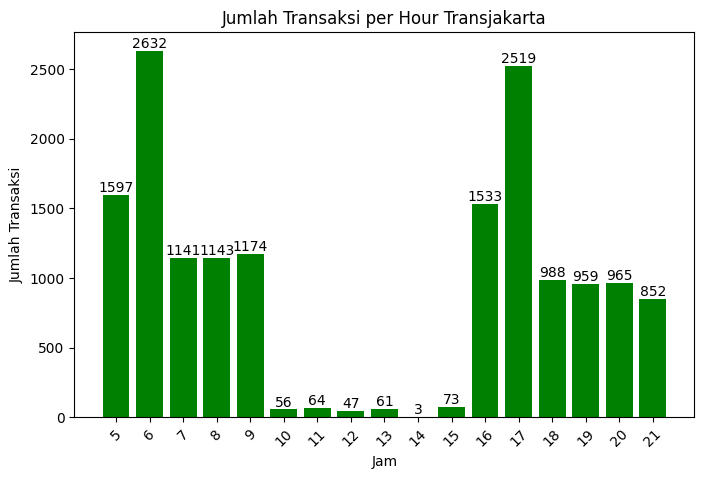

In [14]:
plt.figure(figsize=(8,5))
bars = plt.bar(busyhourWeekdayTJ['tapInHour'],busyhourWeekdayTJ['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.title('Jumlah Transaksi per Hour Transjakarta')
plt.xlabel('Jam')
plt.xticks(np.arange(5,22,1),rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

In [15]:
busyhourWeekendTJ = data_transjakarta[(data_transjakarta['isWeekend']==True)].groupby(by='tapInHour')[['transID']].count().reset_index()
busyhourWeekendTJ

,tapInHour,transID
0,5,97
1,6,95
2,7,102
3,8,106
4,9,93
5,10,87
6,11,88
7,12,107
8,13,91
9,14,73


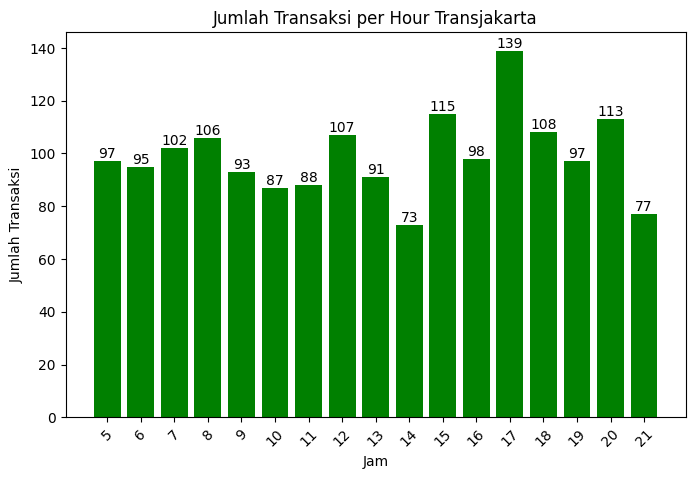

In [16]:
plt.figure(figsize=(8,5))
bars = plt.bar(busyhourWeekendTJ['tapInHour'],busyhourWeekendTJ['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.title('Jumlah Transaksi per Hour Transjakarta')
plt.xlabel('Jam')
plt.xticks(np.arange(5,22,1),rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

### TRANSAKSI KORIDOR TERTINGGI TRANSJAKARTA

In [17]:
busyhourWeekdayTJ = data_transjakarta[(data_transjakarta['isWeekend']==False)][(df['tapInHour']>=16)&(df['tapInHour']<=21)]
busyhourWeekdayTJ.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,JenisLayanan,tapInHour,tapInWeekday,isWeekend
300,FGIY576J9K96QI,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,0.0,P00021,...,Pademangan,-6.133704,106.83164,13.0,2023-04-03 19:19:53,3500.0,transjakarta,17,0,False
301,CAYG359Y2E26NZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,1.0,B03318P,...,Stasiun Tebet,-6.225503,106.85814,11.0,2023-04-03 19:00:15,3500.0,transjakarta,17,0,False
302,OYSZ254V7M55NZ,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,1.0,NaN,...,Simpang Mandara Permai 2,-6.116512,106.75622,31.0,2023-04-03 18:31:18,3500.0,transjakarta,17,0,False
304,UCXG771V8L71ZT,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,1.0,P00241,...,Walikota Jakarta Utara Arah Utara,-6.118842,106.89314,17.0,2023-04-03 18:20:21,3500.0,transjakarta,16,0,False
309,ZLCW600V5F88RI,3580401035990896,dki,"T. Dadap Pradana, M.Ak",M,2004,1Q,Rempoa - Blok M,1.0,B05642P,...,Jln. IKPN Bintaro,-6.259970,106.76787,20.0,2023-04-03 17:41:19,3500.0,transjakarta,16,0,False


In [18]:
transPerCorridorWeekdayTJ = busyhourWeekdayTJ.groupby(by='corridorID')[['transID']].count().reset_index()
transPerCorridorWeekdayTJ

,corridorID,transID
0,1,112
1,10,38
2,10D,78
3,10H,58
4,10K,58
...,...,...
101,R1A,91
102,S11,57
103,S21,179
104,S22,55


In [19]:
meanWeekdayTJ = transPerCorridorWeekdayTJ['transID'].mean()
meanWeekdayTJ

73.73584905660377

In [20]:
# X = top 50
transPerCorridorXTJ = transPerCorridorWeekdayTJ.sort_values(by='transID',ascending=False).head(50)
transPerCorridorXTJ

,corridorID,transID
103,S21,179
87,JIS3,157
71,8C,155
7,11Q,138
79,9D,137
56,6N,136
29,2,132
32,2P,123
90,M10,122
60,6V,122


In [21]:
# Y = bottom 50
transPerCorridorYTJ = transPerCorridorWeekdayTJ.sort_values(by='transID',ascending=False).tail(50)
transPerCorridorYTJ

,corridorID,transID
45,5D,63
81,9H,63
19,1B,62
59,6U,62
51,6B,61
30,2A,61
11,12H,61
61,7,61
24,1M,61
21,1E,60


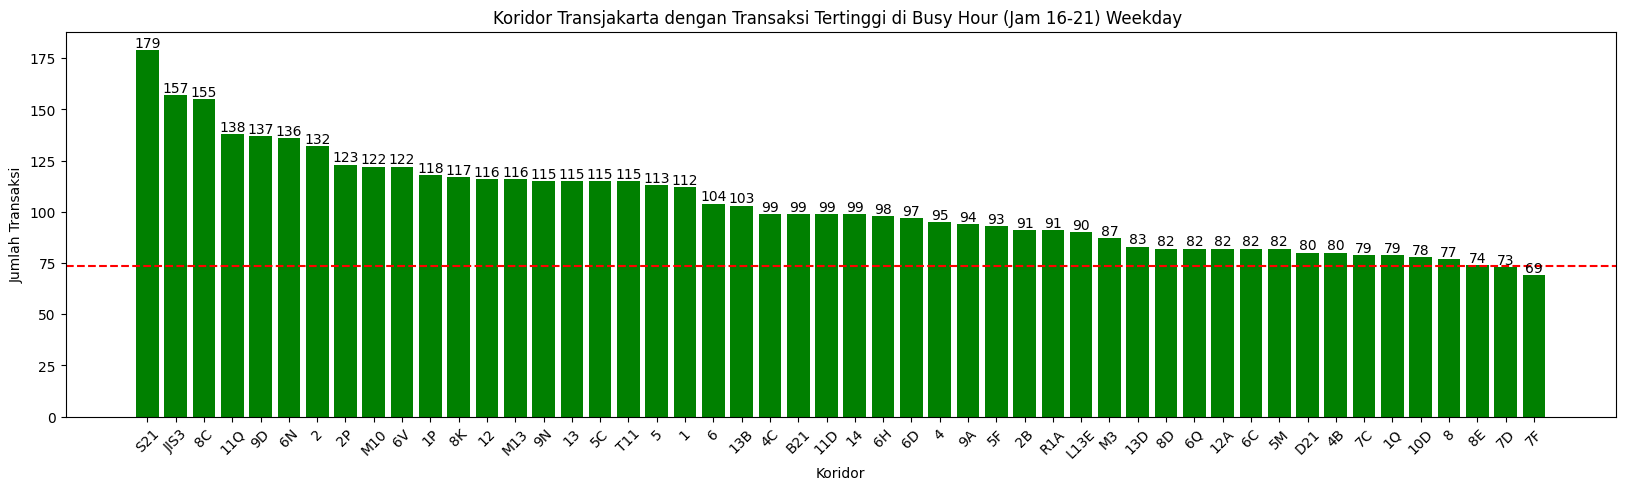

In [22]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorXTJ['corridorID'],transPerCorridorXTJ['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayTJ, color='r', linestyle='--')
plt.title('Koridor Transjakarta dengan Transaksi Tertinggi di Busy Hour (Jam 16-21) Weekday ')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

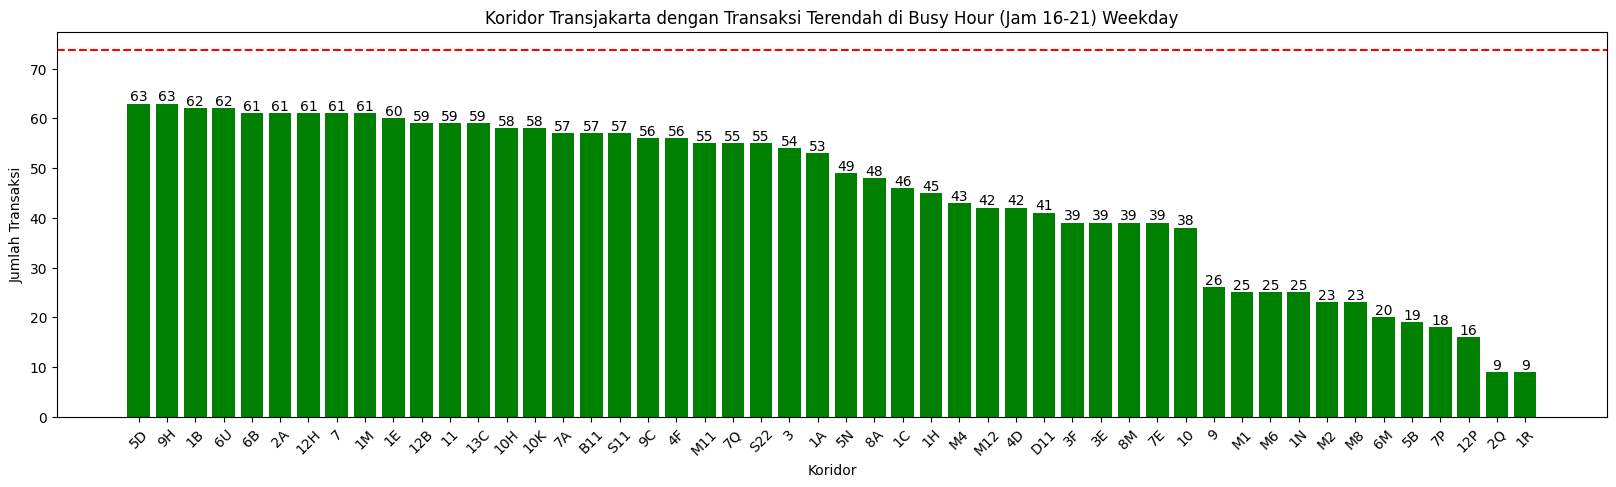

In [23]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorYTJ['corridorID'],transPerCorridorYTJ['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayTJ, color='r', linestyle='--')
plt.title('Koridor Transjakarta dengan Transaksi Terendah di Busy Hour (Jam 16-21) Weekday')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

In [24]:
dfBusyHourWeekdayTJ2 = data_transjakarta[(data_transjakarta['isWeekend']==False)][(data_transjakarta['tapInHour']>=5)&(data_transjakarta['tapInHour']<=9)]
dfBusyHourWeekdayTJ2.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,JenisLayanan,tapInHour,tapInWeekday,isWeekend
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,transjakarta,5,0,False
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,transjakarta,5,0,False
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,transjakarta,5,0,False
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,transjakarta,5,0,False
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,transjakarta,6,0,False


In [25]:
transPerCorridorWeekdayTJ2 = dfBusyHourWeekdayTJ2.groupby(by='corridorID')[['transID']].count().reset_index()
transPerCorridorWeekdayTJ2

,corridorID,transID
0,1,110
1,10,39
2,10D,78
3,10H,57
4,10K,58
...,...,...
101,R1A,97
102,S11,55
103,S21,177
104,S22,61


In [26]:
meanWeekdayTJ2 = transPerCorridorWeekdayTJ2['transID'].mean()
meanWeekdayTJ2

72.51886792452831

In [27]:
# X = top 50
transPerCorridorXTJ2 = transPerCorridorWeekdayTJ2.sort_values(by='transID',ascending=False).head(50)
transPerCorridorXTJ2

,corridorID,transID
103,S21,177
71,8C,160
87,JIS3,155
7,11Q,136
79,9D,135
29,2,135
56,6N,130
105,T11,123
93,M13,119
60,6V,119


In [28]:
# Y = bottom 50
transPerCorridorYTJ2 = transPerCorridorWeekdayTJ2.sort_values(by='transID',ascending=False).tail(50)
transPerCorridorYTJ2

,corridorID,transID
98,M7,62
104,S22,61
66,7F,61
80,9E,61
45,5D,61
59,6U,61
19,1B,60
30,2A,59
34,3,59
51,6B,59


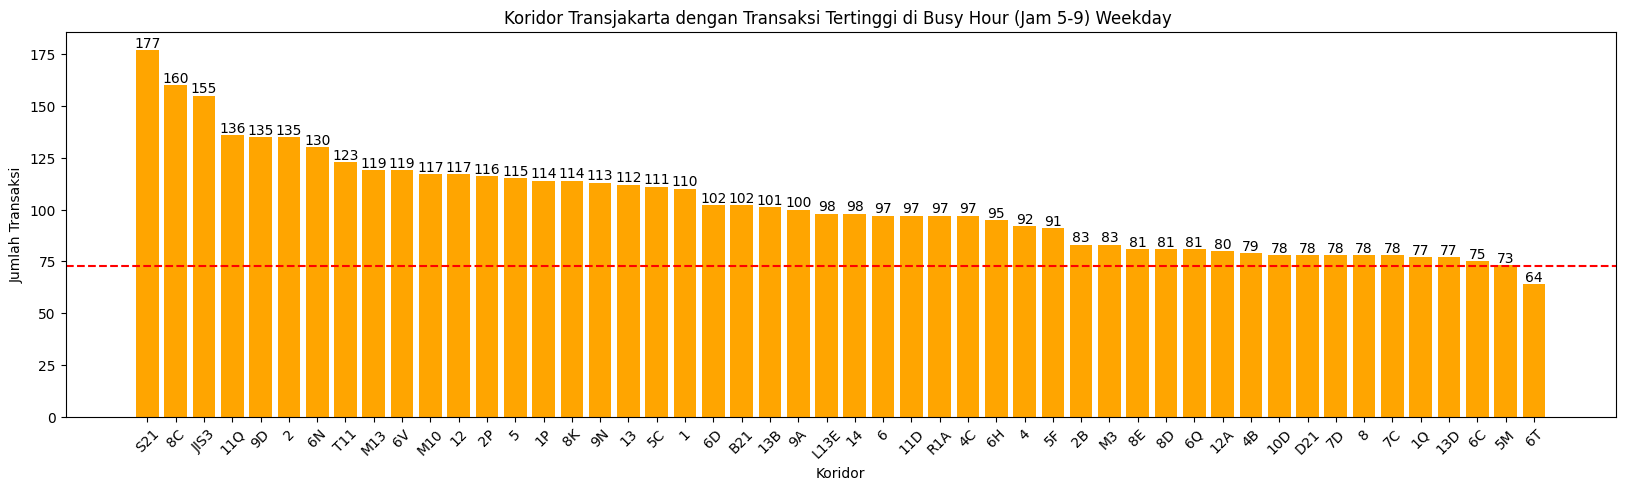

In [29]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorXTJ2['corridorID'],transPerCorridorXTJ2['transID'],color='orange')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayTJ2, color='r', linestyle='--')
plt.title('Koridor Transjakarta dengan Transaksi Tertinggi di Busy Hour (Jam 5-9) Weekday ')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

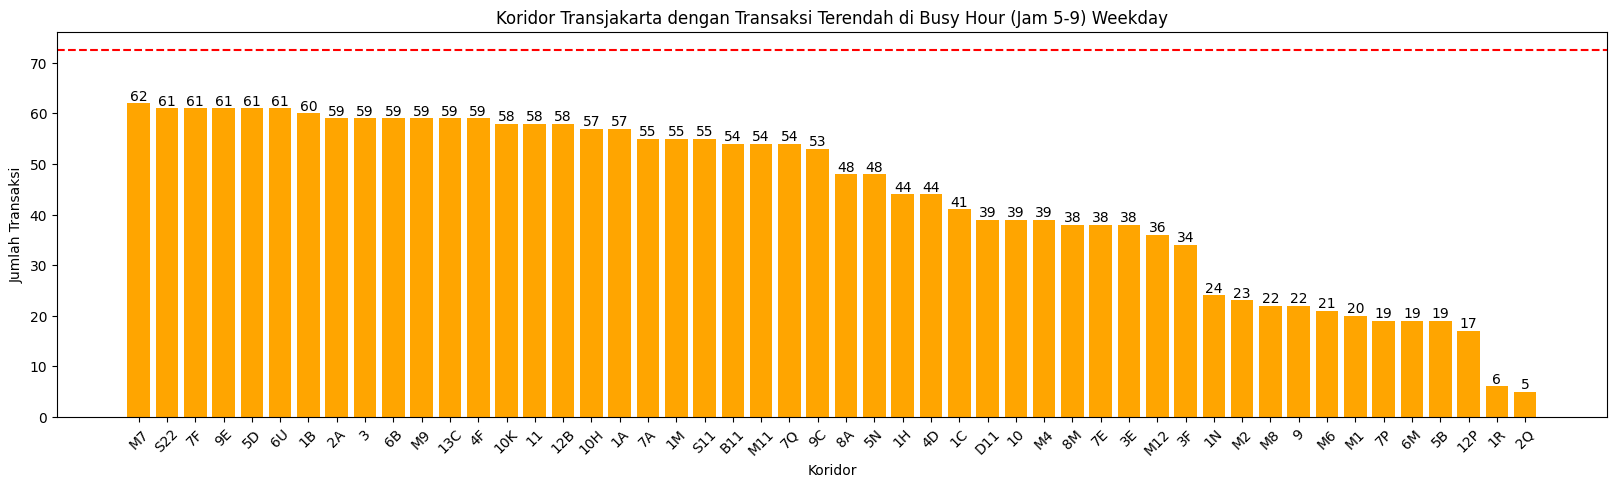

In [30]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorYTJ2['corridorID'],transPerCorridorYTJ2['transID'],color='orange')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayTJ2, color='r', linestyle='--')
plt.title('Koridor Transjakarta dengan Transaksi Terendah di Busy Hour (Jam 5-9) Weekday')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

In [31]:
# HALTE TERPADAT
haltePerTransaksiTJ = data_transjakarta.groupby(by='tapInStopsName')[['transID']].count().reset_index()
haltePerTransaksiTJ = haltePerTransaksiTJ.sort_values(by='transID',ascending=False).head(50)
haltePerTransaksiTJ.head()

,tapInStopsName,transID
160,Garuda Taman Mini,195
27,BKN,165
540,Pejaten,149
31,BNN LRT,149
813,Seskoal,120


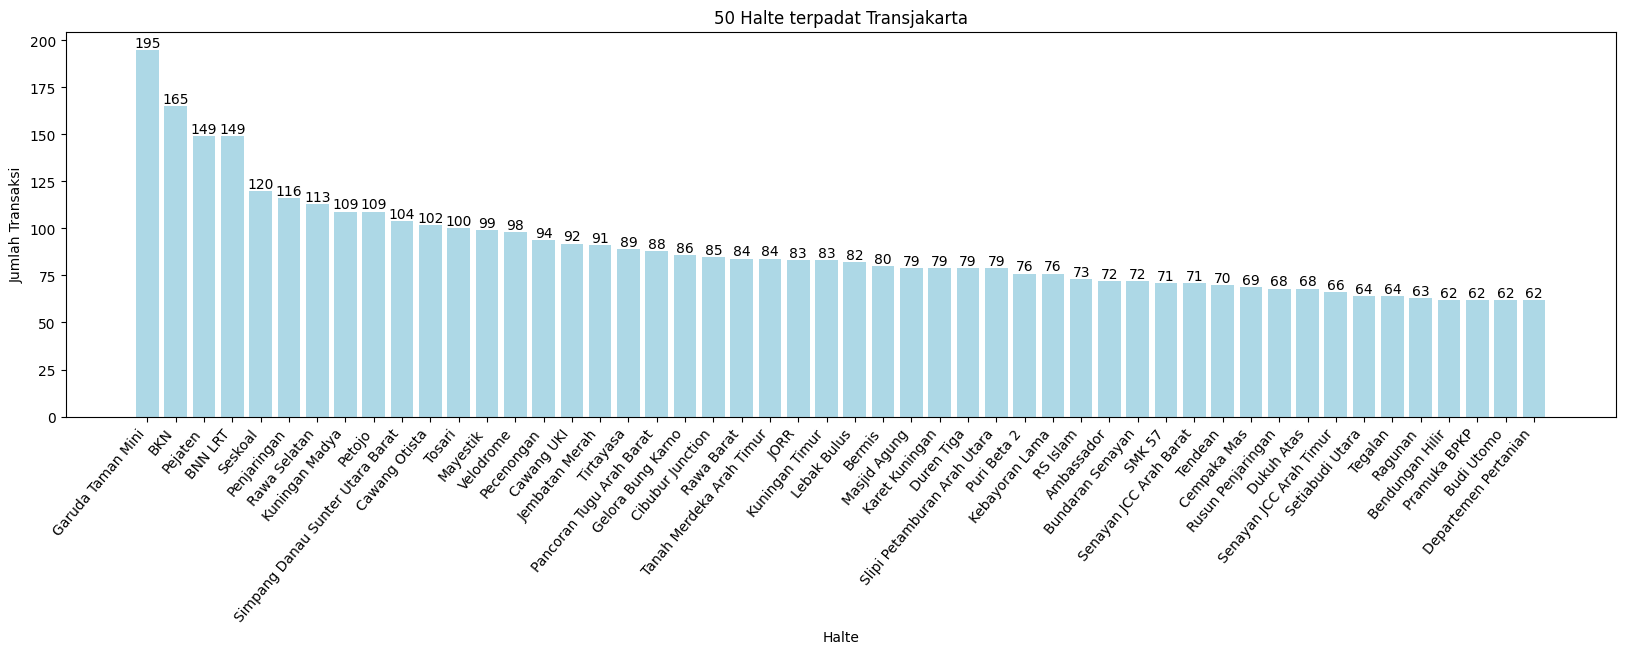

In [32]:
plt.figure(figsize=(20,5))
bars = plt.bar(haltePerTransaksiTJ['tapInStopsName'],haltePerTransaksiTJ['transID'],color='#ADD8E6')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.title('50 Halte terpadat Transjakarta')
plt.xlabel('Halte')
plt.xticks(rotation=50,ha='right')
plt.ylabel('Jumlah Transaksi')
plt.show()

In [33]:
busyhourWeekdayTJ = data_transjakarta[(data_transjakarta['isWeekend']==False)][(df['tapInHour']>=16)&(df['tapInHour']<=21)]
busyhourWeekdayTJ.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,JenisLayanan,tapInHour,tapInWeekday,isWeekend
300,FGIY576J9K96QI,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,0.0,P00021,...,Pademangan,-6.133704,106.83164,13.0,2023-04-03 19:19:53,3500.0,transjakarta,17,0,False
301,CAYG359Y2E26NZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,1.0,B03318P,...,Stasiun Tebet,-6.225503,106.85814,11.0,2023-04-03 19:00:15,3500.0,transjakarta,17,0,False
302,OYSZ254V7M55NZ,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,1.0,NaN,...,Simpang Mandara Permai 2,-6.116512,106.75622,31.0,2023-04-03 18:31:18,3500.0,transjakarta,17,0,False
304,UCXG771V8L71ZT,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,1.0,P00241,...,Walikota Jakarta Utara Arah Utara,-6.118842,106.89314,17.0,2023-04-03 18:20:21,3500.0,transjakarta,16,0,False
309,ZLCW600V5F88RI,3580401035990896,dki,"T. Dadap Pradana, M.Ak",M,2004,1Q,Rempoa - Blok M,1.0,B05642P,...,Jln. IKPN Bintaro,-6.259970,106.76787,20.0,2023-04-03 17:41:19,3500.0,transjakarta,16,0,False


In [34]:
transPerCorridorWeekdayTJ = busyhourWeekdayTJ.groupby(by='corridorID')[['transID']].count().reset_index()
transPerCorridorWeekdayTJ

,corridorID,transID
0,1,112
1,10,38
2,10D,78
3,10H,58
4,10K,58
...,...,...
101,R1A,91
102,S11,57
103,S21,179
104,S22,55


In [35]:
meanWeekdayTJ = transPerCorridorWeekdayTJ['transID'].mean()
meanWeekdayTJ

73.73584905660377

In [36]:
# X = top 50
transPerCorridorXTJ = transPerCorridorWeekdayTJ.sort_values(by='transID',ascending=False).head(50)
transPerCorridorXTJ

,corridorID,transID
103,S21,179
87,JIS3,157
71,8C,155
7,11Q,138
79,9D,137
56,6N,136
29,2,132
32,2P,123
90,M10,122
60,6V,122


In [37]:
# Y = bottom 50
transPerCorridorYTJ = transPerCorridorWeekdayTJ.sort_values(by='transID',ascending=False).tail(50)
transPerCorridorYTJ

,corridorID,transID
45,5D,63
81,9H,63
19,1B,62
59,6U,62
51,6B,61
30,2A,61
11,12H,61
61,7,61
24,1M,61
21,1E,60


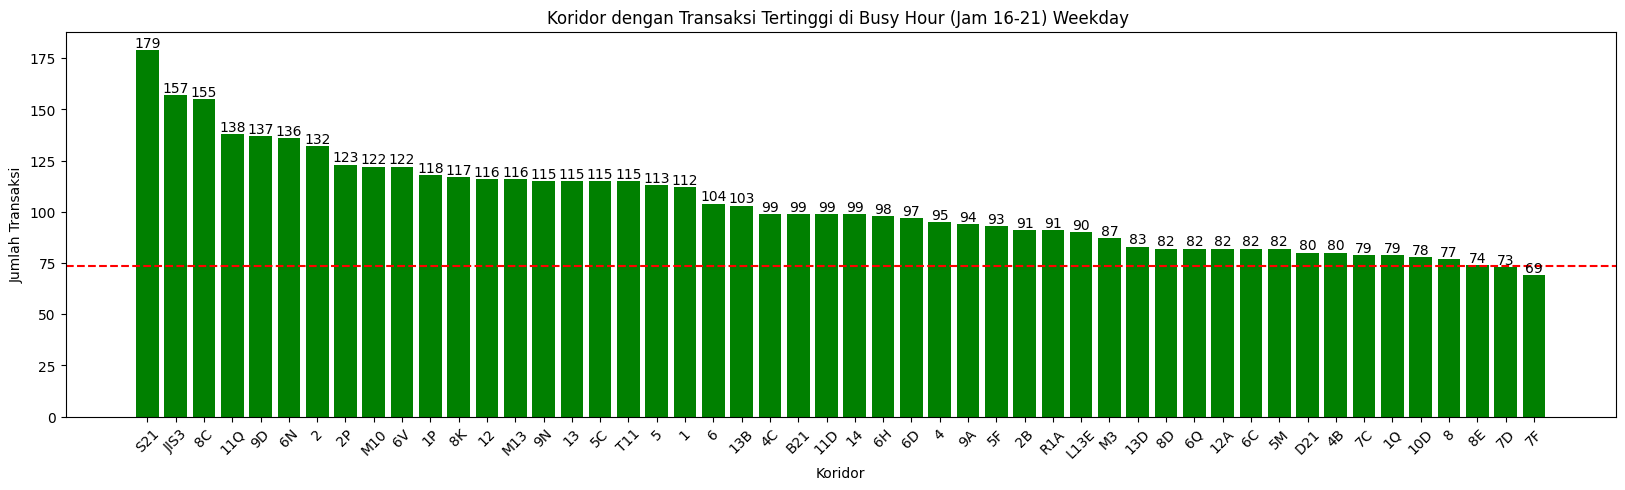

In [38]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorXTJ['corridorID'],transPerCorridorXTJ['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayTJ, color='r', linestyle='--')
plt.title('Koridor dengan Transaksi Tertinggi di Busy Hour (Jam 16-21) Weekday ')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

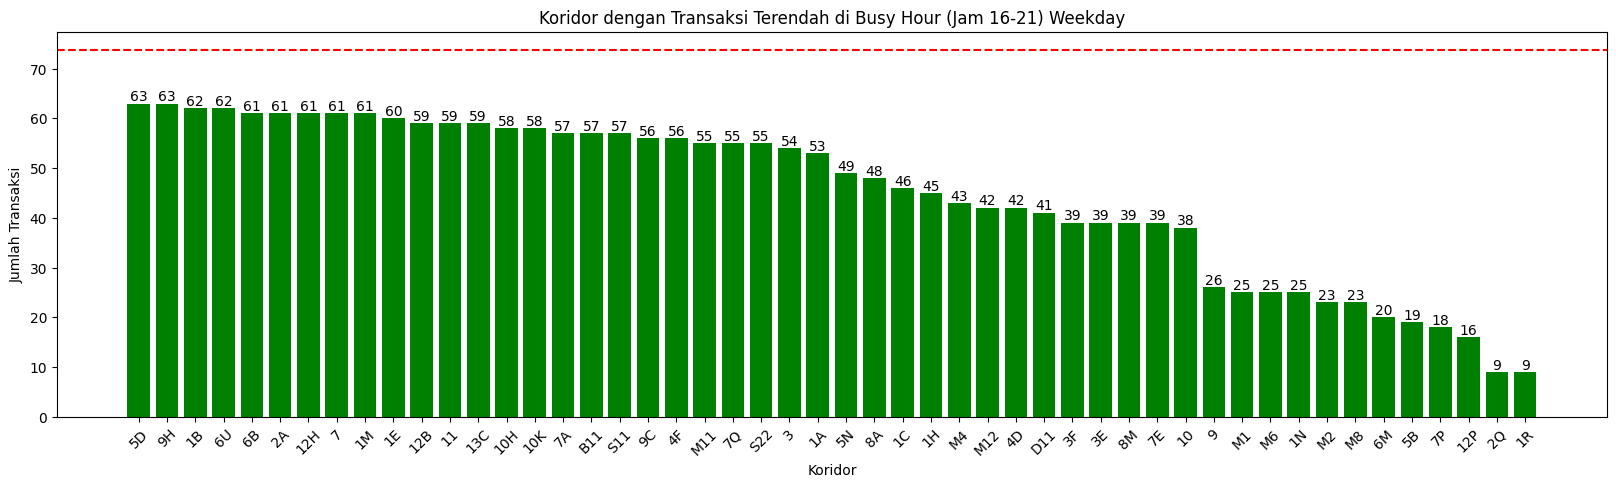

In [39]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorYTJ['corridorID'],transPerCorridorYTJ['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayTJ, color='r', linestyle='--')
plt.title('Koridor dengan Transaksi Terendah di Busy Hour (Jam 16-21) Weekday')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

In [40]:
dfBusyHourWeekdayTJ2 = data_transjakarta[(data_transjakarta['isWeekend']==False)][(data_transjakarta['tapInHour']>=5)&(data_transjakarta['tapInHour']<=9)]
dfBusyHourWeekdayTJ2.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,JenisLayanan,tapInHour,tapInWeekday,isWeekend
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,transjakarta,5,0,False
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,transjakarta,5,0,False
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,transjakarta,5,0,False
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,transjakarta,5,0,False
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,transjakarta,6,0,False


In [41]:
transPerCorridorWeekdayTJ2 = dfBusyHourWeekdayTJ2.groupby(by='corridorID')[['transID']].count().reset_index()
transPerCorridorWeekdayTJ2

,corridorID,transID
0,1,110
1,10,39
2,10D,78
3,10H,57
4,10K,58
...,...,...
101,R1A,97
102,S11,55
103,S21,177
104,S22,61


In [42]:
meanWeekdayTJ2 = transPerCorridorWeekdayTJ2['transID'].mean()
meanWeekdayTJ2

72.51886792452831

In [43]:
# X = top 50
transPerCorridorXTJ2 = transPerCorridorWeekdayTJ2.sort_values(by='transID',ascending=False).head(50)
transPerCorridorXTJ2

,corridorID,transID
103,S21,177
71,8C,160
87,JIS3,155
7,11Q,136
79,9D,135
29,2,135
56,6N,130
105,T11,123
93,M13,119
60,6V,119


In [44]:
# Y = bottom 50
transPerCorridorYTJ2 = transPerCorridorWeekdayTJ2.sort_values(by='transID',ascending=False).tail(50)
transPerCorridorYTJ2

,corridorID,transID
98,M7,62
104,S22,61
66,7F,61
80,9E,61
45,5D,61
59,6U,61
19,1B,60
30,2A,59
34,3,59
51,6B,59


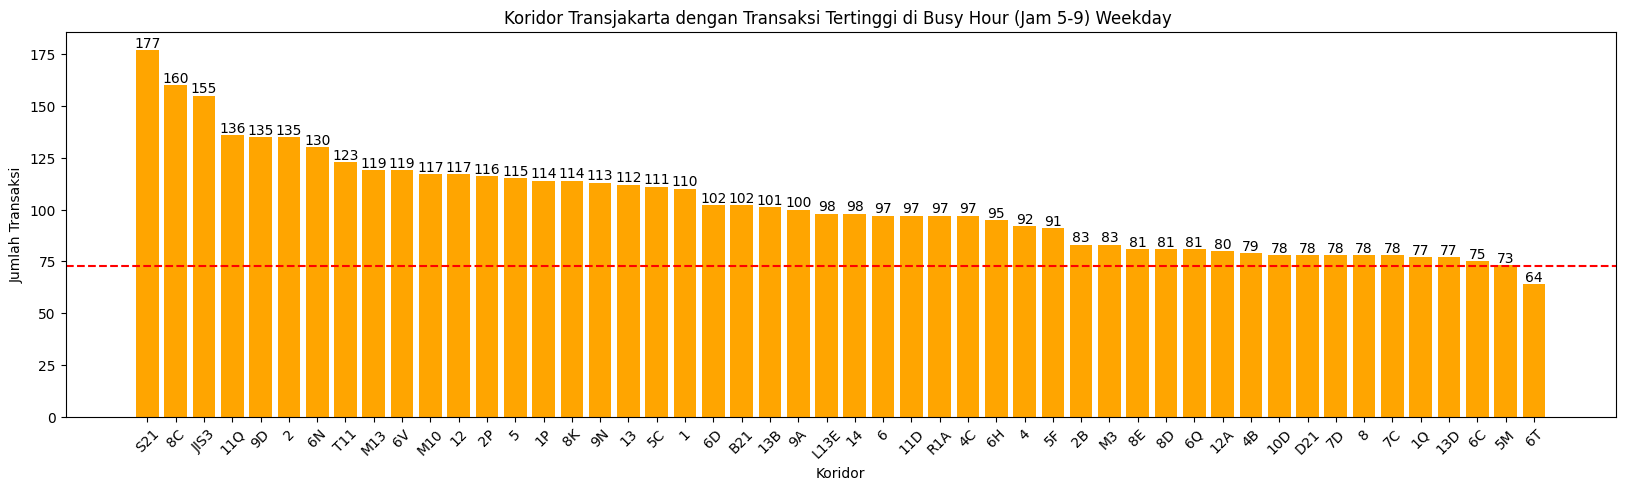

In [45]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorXTJ2['corridorID'],transPerCorridorXTJ2['transID'],color='orange')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayTJ2, color='r', linestyle='--')
plt.title('Koridor Transjakarta dengan Transaksi Tertinggi di Busy Hour (Jam 5-9) Weekday ')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

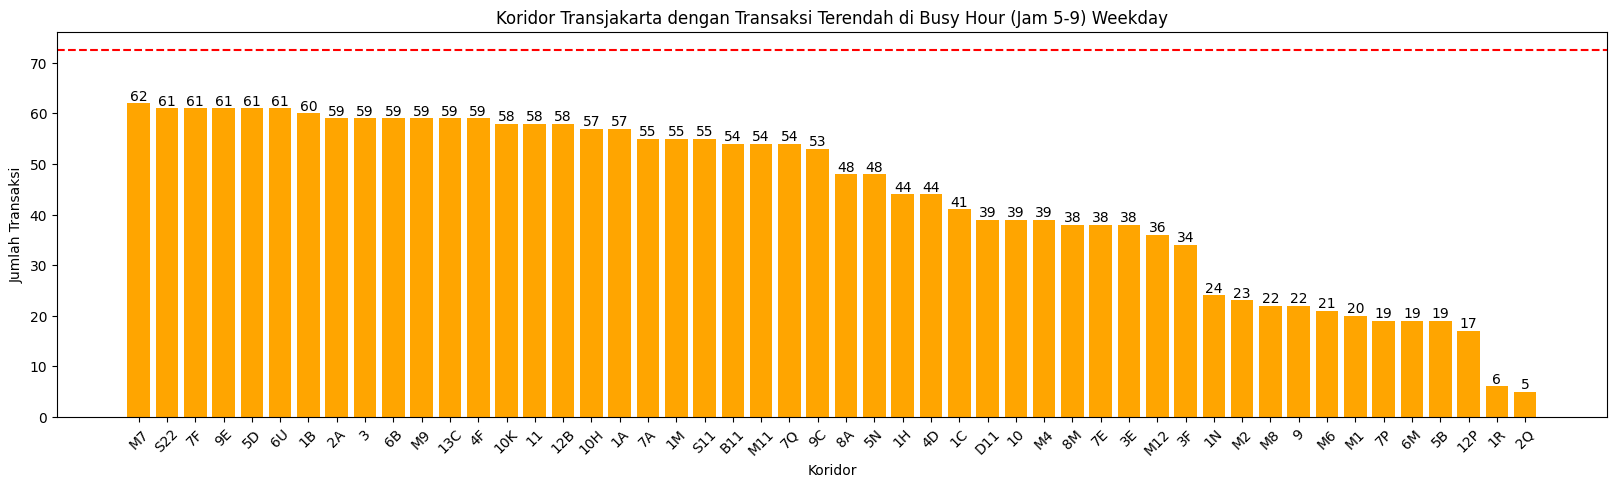

In [46]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorYTJ2['corridorID'],transPerCorridorYTJ2['transID'],color='orange')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayTJ2, color='r', linestyle='--')
plt.title('Koridor Transjakarta dengan Transaksi Terendah di Busy Hour (Jam 5-9) Weekday')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

In [47]:
# HALTE TERPADAT
haltePerTransaksiTJ2 = data_transjakarta.groupby(by='tapInStopsName')[['transID']].count().reset_index()
haltePerTransaksiTJ2 = haltePerTransaksiTJ2.sort_values(by='transID',ascending=False).head(50)
haltePerTransaksiTJ2.head()

,tapInStopsName,transID
160,Garuda Taman Mini,195
27,BKN,165
540,Pejaten,149
31,BNN LRT,149
813,Seskoal,120


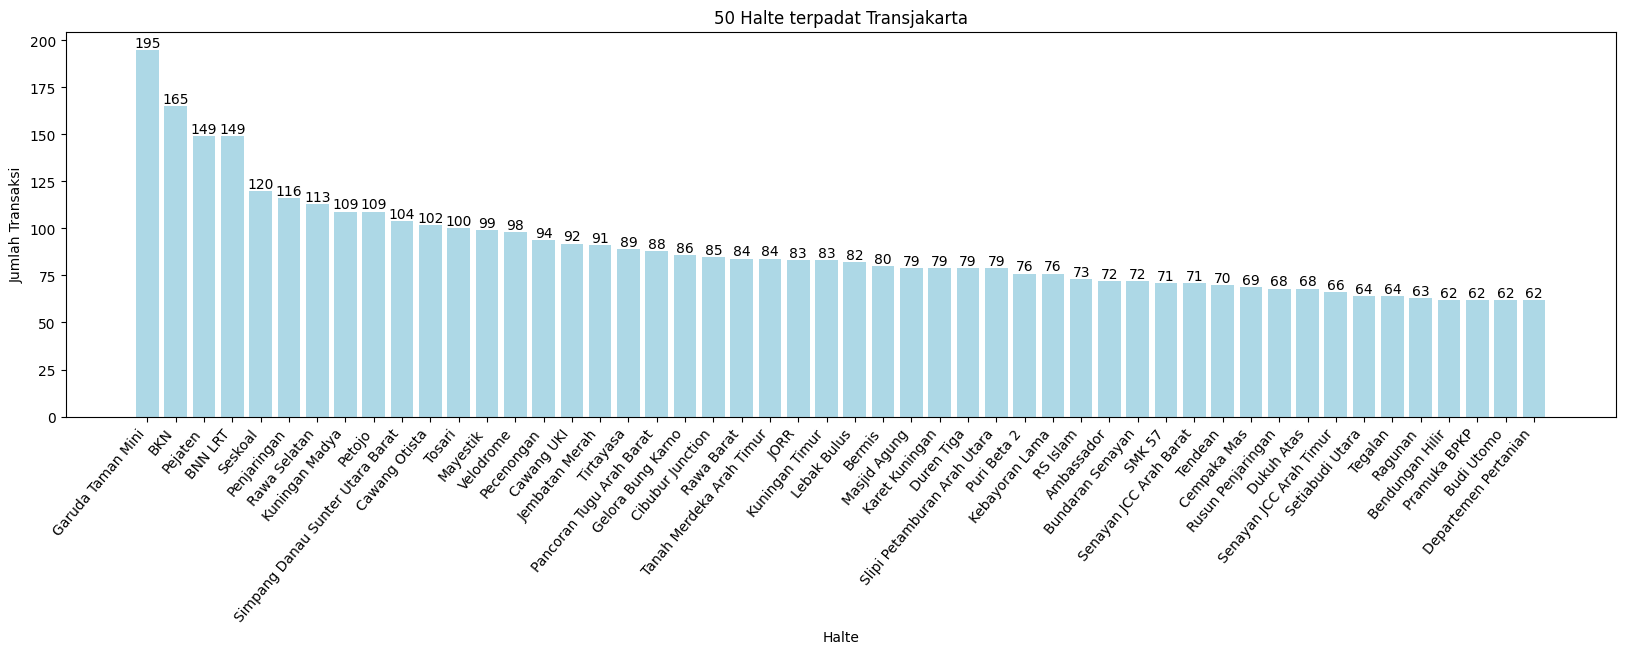

In [48]:
plt.figure(figsize=(20,5))
bars = plt.bar(haltePerTransaksiTJ2['tapInStopsName'],haltePerTransaksiTJ2['transID'],color='#ADD8E6')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.title('50 Halte terpadat Transjakarta')
plt.xlabel('Halte')
plt.xticks(rotation=50,ha='right')
plt.ylabel('Jumlah Transaksi')
plt.show()

### BUSY HOUR MIKROTRANS

In [49]:
busyhourWeekdayMT = data_mikrotrans[(data_mikrotrans['isWeekend']==False)].groupby(by='tapInHour')[['transID']].count().reset_index()
busyhourWeekdayMT

,tapInHour,transID
0,5,1218
1,6,2333
2,7,1103
3,8,1131
4,9,1059
5,10,37
6,11,62
7,12,56
8,13,54
9,14,6


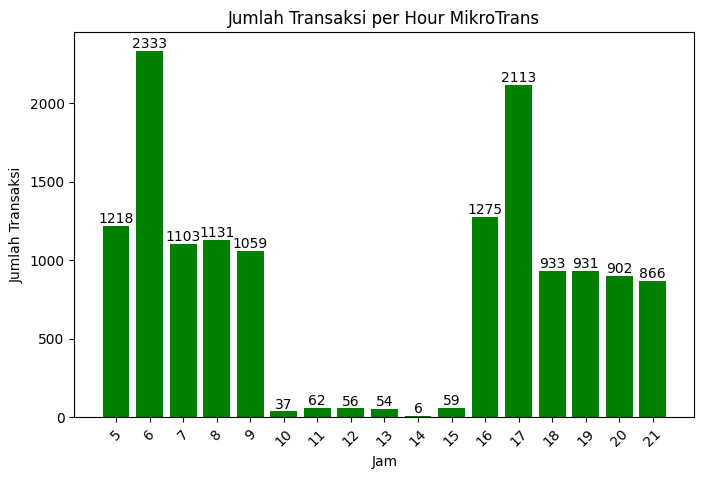

In [50]:
plt.figure(figsize=(8,5))
bars = plt.bar(busyhourWeekdayMT['tapInHour'],busyhourWeekdayMT['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.title('Jumlah Transaksi per Hour MikroTrans')
plt.xlabel('Jam')
plt.xticks(np.arange(5,22,1),rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

In [51]:
busyhourWeekendMT = data_mikrotrans[(data_mikrotrans['isWeekend']==True)].groupby(by='tapInHour')[['transID']].count().reset_index()
busyhourWeekendMT

,tapInHour,transID
0,5,103
1,6,88
2,7,84
3,8,103
4,9,90
5,10,88
6,11,90
7,12,77
8,13,108
9,14,77


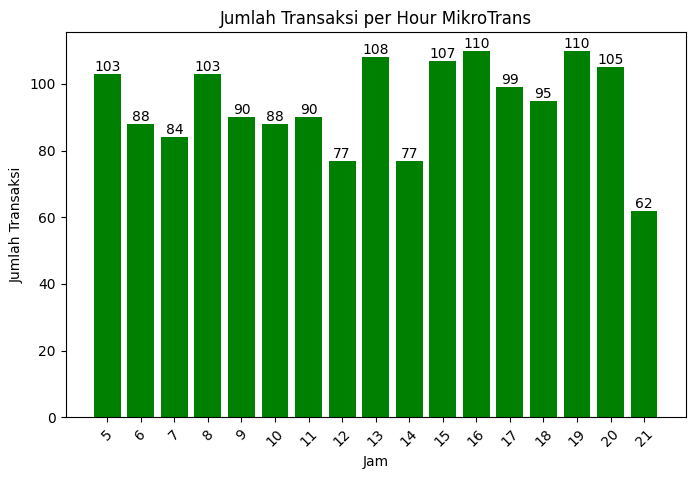

In [52]:
plt.figure(figsize=(8,5))
bars = plt.bar(busyhourWeekendMT['tapInHour'],busyhourWeekendMT['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.title('Jumlah Transaksi per Hour MikroTrans')
plt.xlabel('Jam')
plt.xticks(np.arange(5,22,1),rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

### TRANSAKSI KORIDOR TERTINGGI MIKROTRANS

In [53]:
busyhourWeekdayMT = data_mikrotrans[(data_mikrotrans['isWeekend']==False)][(df['tapInHour']>=16)&(df['tapInHour']<=21)]
busyhourWeekdayMT.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,JenisLayanan,tapInHour,tapInWeekday,isWeekend
306,UQBO067F4Q46YH,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,1.0,B01567P,...,Masjid Al Barakah Assyafiiyah,-6.220472,106.85080,15.0,2023-04-03 17:37:59,0.0,mikrotrans,16,0,False
307,YCKA830Y7F54EU,3587341902618993,dki,Darmanto Rajasa,F,1991,JAK.03,Lebak Bulus - Andara,0.0,B01204P,...,Jln. Pinang II Pondok Labu,-6.310414,106.79665,22.0,2023-04-03 19:43:32,0.0,mikrotrans,17,0,False
314,CRPN719K9R79EE,4056836188316,online,Nadine Utami,M,1975,JAK.46,Pasar Minggu - Jagakarsa,0.0,B01591P,...,Sbr. Gg. H. Yusuf Jati Padang,-6.293140,106.82863,27.0,2023-04-03 19:05:46,0.0,mikrotrans,17,0,False
319,WSBL539K5G66AY,5430018591726410,dki,Karna Waskita,M,1981,JAK.88,Terminal Tanjung Priok - Ancol Barat,1.0,B05970P,...,Jln. R. E. Martadinata,-6.130036,106.83429,19.0,2023-04-03 18:09:58,0.0,mikrotrans,16,0,False
321,MOHL390Z9E69AL,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,1.0,B03038P,...,Gg. Ayama,-6.272040,106.86710,29.0,2023-04-03 17:32:45,0.0,mikrotrans,16,0,False


In [54]:
transPerCorridorWeekdayMT = busyhourWeekdayMT.groupby(by='corridorID')[['transID']].count().reset_index()
transPerCorridorWeekdayMT

,corridorID,transID
0,10A,57
1,10B,61
2,11B,32
3,11C,19
4,11K,60
...,...,...
93,JAK.84,38
94,JAK.85,62
95,JAK.86,88
96,JAK.88,77


In [55]:
meanWeekdayMT = transPerCorridorWeekdayMT['transID'].mean()
meanWeekdayMT

71.63265306122449

In [56]:
# X = top 50
transPerCorridorXMT = transPerCorridorWeekdayMT.sort_values(by='transID',ascending=False).head(50)
transPerCorridorXMT

,corridorID,transID
24,JAK.06,160
7,11P,152
10,2E,147
67,JAK.42,138
87,JAK.72,134
29,JAK.11,133
31,JAK.112,124
52,JAK.27,124
74,JAK.49,119
70,JAK.44,119


In [57]:
# Y = bottom 50
transPerCorridorYMT = transPerCorridorWeekdayMT.sort_values(by='transID',ascending=False).tail(50)
transPerCorridorYMT

,corridorID,transID
44,JAK.19,73
84,JAK.61,69
19,JAK.01,64
56,JAK.31,63
71,JAK.45,63
16,4E,62
79,JAK.54,62
30,JAK.110A,62
33,JAK.115,62
94,JAK.85,62


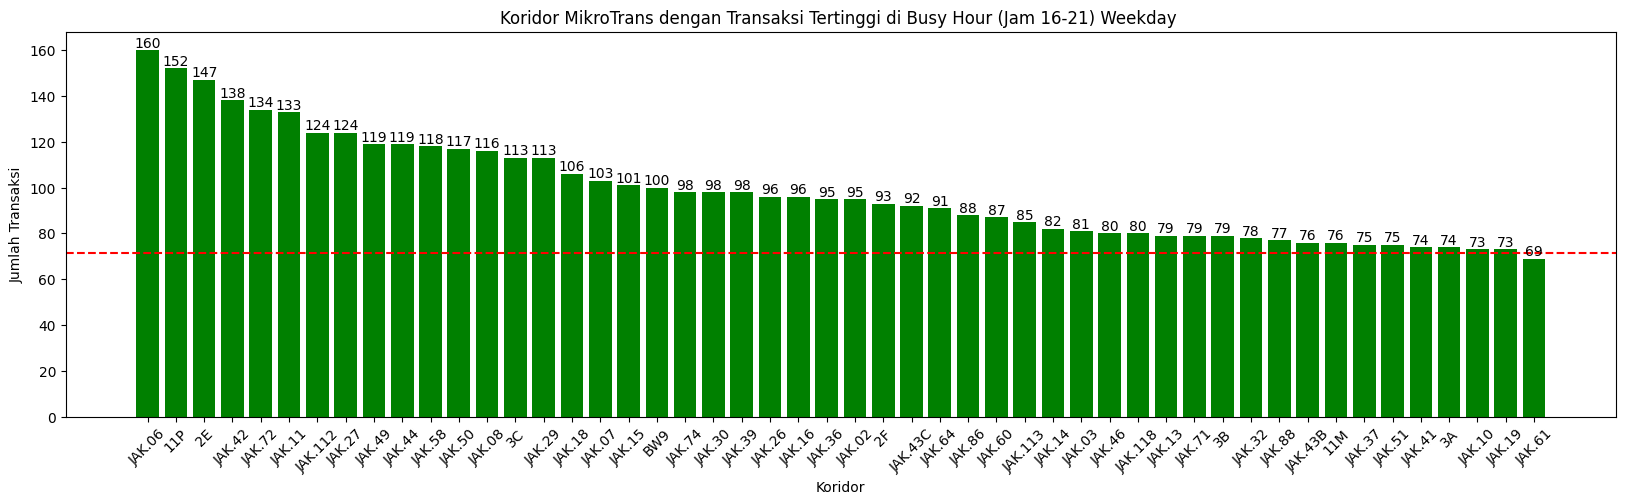

In [58]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorXMT['corridorID'],transPerCorridorXMT['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayMT, color='r', linestyle='--')
plt.title('Koridor MikroTrans dengan Transaksi Tertinggi di Busy Hour (Jam 16-21) Weekday ')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

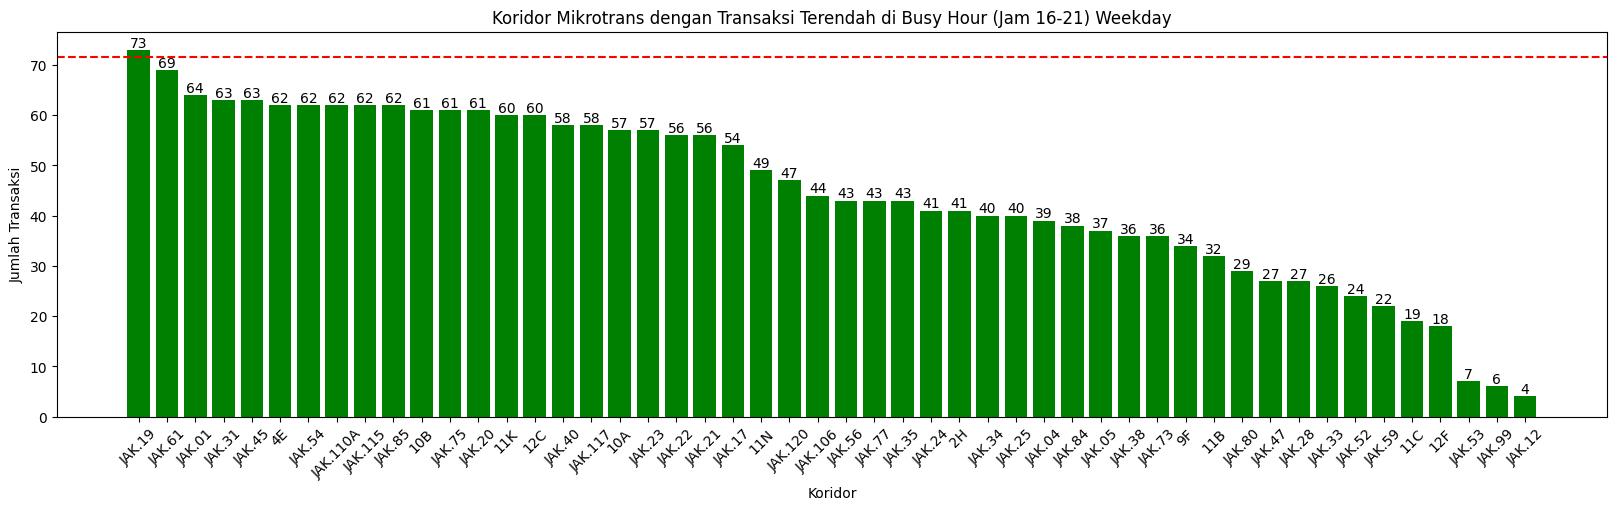

In [59]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorYMT['corridorID'],transPerCorridorYMT['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayMT, color='r', linestyle='--')
plt.title('Koridor Mikrotrans dengan Transaksi Terendah di Busy Hour (Jam 16-21) Weekday')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

In [60]:
dfBusyHourWeekdayMT2 = data_mikrotrans[(data_mikrotrans['isWeekend']==False)][(data_mikrotrans['tapInHour']>=5)&(data_mikrotrans['tapInHour']<=9)]
dfBusyHourWeekdayMT2.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,JenisLayanan,tapInHour,tapInWeekday,isWeekend
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,NaN,NaN,NaN,NaN,NaN,0.0,mikrotrans,6,0,False
14,LZFD368Q3E81HJ,4056836188316,online,Nadine Utami,M,1975,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00608P,...,Jln. Gabus Raya,-6.301222,106.83623,17.0,2023-04-03 06:09:17,0.0,mikrotrans,5,0,False
19,ZYRL615G4C05RD,5430018591726410,dki,Karna Waskita,M,1981,JAK.88,Terminal Tanjung Priok - Ancol Barat,0.0,B00722P,...,Jln. Ancol Barat 6,-6.124810,106.81983,36.0,2023-04-03 07:30:45,0.0,mikrotrans,6,0,False
21,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,NaN,...,Jln. Mesjid Al Mabruk,-6.284350,106.85293,20.0,2023-04-03 05:30:45,0.0,mikrotrans,5,0,False
24,SYLN486U0E02TA,2295833910329055,dki,Taufik Farida,F,1981,JAK.02,Kampung Melayu - Duren Sawit,0.0,B05023P,...,RS Duren Sawit 2,-6.232262,106.91019,39.0,2023-04-03 06:12:52,0.0,mikrotrans,5,0,False


In [61]:
transPerCorridorWeekdayMT2 = dfBusyHourWeekdayMT2.groupby(by='corridorID')[['transID']].count().reset_index()
transPerCorridorWeekdayMT2

,corridorID,transID
0,10A,60
1,10B,60
2,11B,28
3,11C,20
4,11K,60
...,...,...
93,JAK.84,36
94,JAK.85,57
95,JAK.86,81
96,JAK.88,82


In [62]:
meanWeekdayMT2 = transPerCorridorWeekdayMT2['transID'].mean()
meanWeekdayMT2

69.83673469387755

In [63]:
# X = top 50
transPerCorridorXMT2 = transPerCorridorWeekdayMT2.sort_values(by='transID',ascending=False).head(50)
transPerCorridorXMT2

,corridorID,transID
7,11P,157
24,JAK.06,156
87,JAK.72,141
10,2E,138
29,JAK.11,135
67,JAK.42,130
31,JAK.112,118
15,3C,118
81,JAK.58,116
52,JAK.27,116


In [64]:
# Y = bottom 50
transPerCorridorYMT2 = transPerCorridorWeekdayMT2.sort_values(by='transID',ascending=False).tail(50)
transPerCorridorYMT2

,corridorID,transID
62,JAK.37,64
44,JAK.19,62
16,4E,62
45,JAK.20,61
0,10A,60
84,JAK.61,60
90,JAK.75,60
4,11K,60
1,10B,60
30,JAK.110A,60


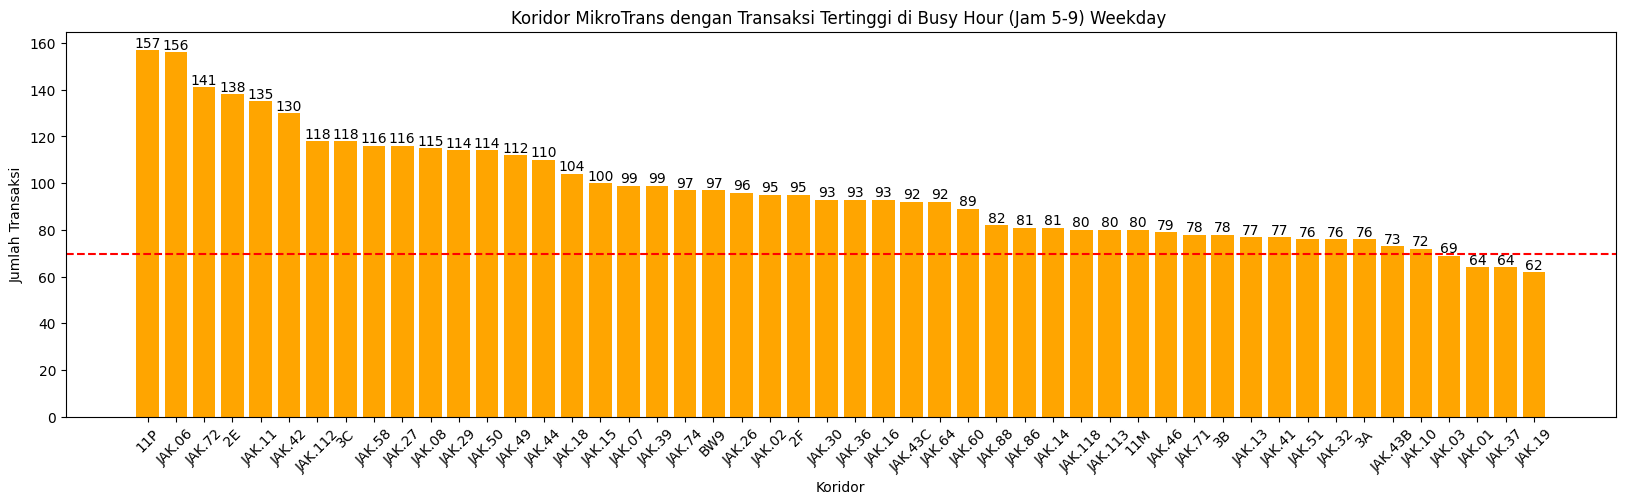

In [65]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorXMT2['corridorID'],transPerCorridorXMT2['transID'],color='orange')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayMT2, color='r', linestyle='--')
plt.title('Koridor MikroTrans dengan Transaksi Tertinggi di Busy Hour (Jam 5-9) Weekday ')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

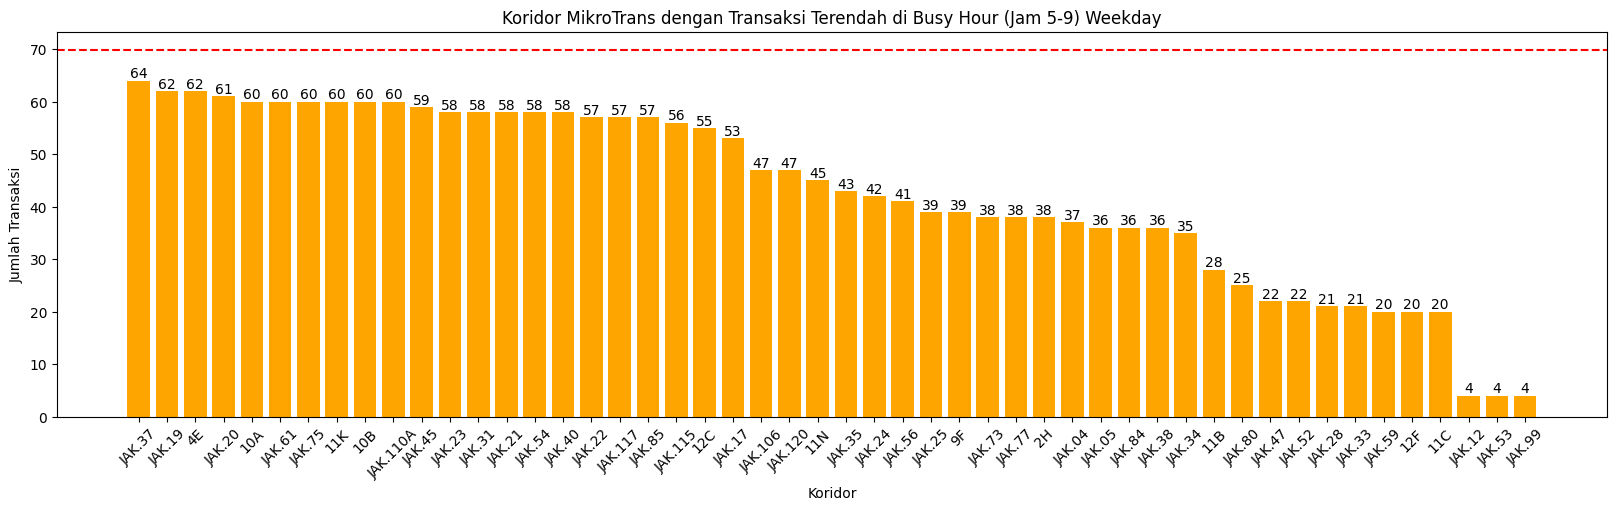

In [66]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorYMT2['corridorID'],transPerCorridorYMT2['transID'],color='orange')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayMT2, color='r', linestyle='--')
plt.title('Koridor MikroTrans dengan Transaksi Terendah di Busy Hour (Jam 5-9) Weekday')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

In [67]:
# HALTE TERPADAT
haltePerTransaksiMT = data_mikrotrans.groupby(by='tapInStopsName')[['transID']].count().reset_index()
haltePerTransaksiMT = haltePerTransaksiMT.sort_values(by='transID',ascending=False).head(50)
haltePerTransaksiMT.head()

,tapInStopsName,transID
920,Rusun Kapuk Muara,129
729,Penjaringan,116
726,Penggilingan,105
1592,Walikota Jakarta Timur,59
929,Rusun Pesakih,59


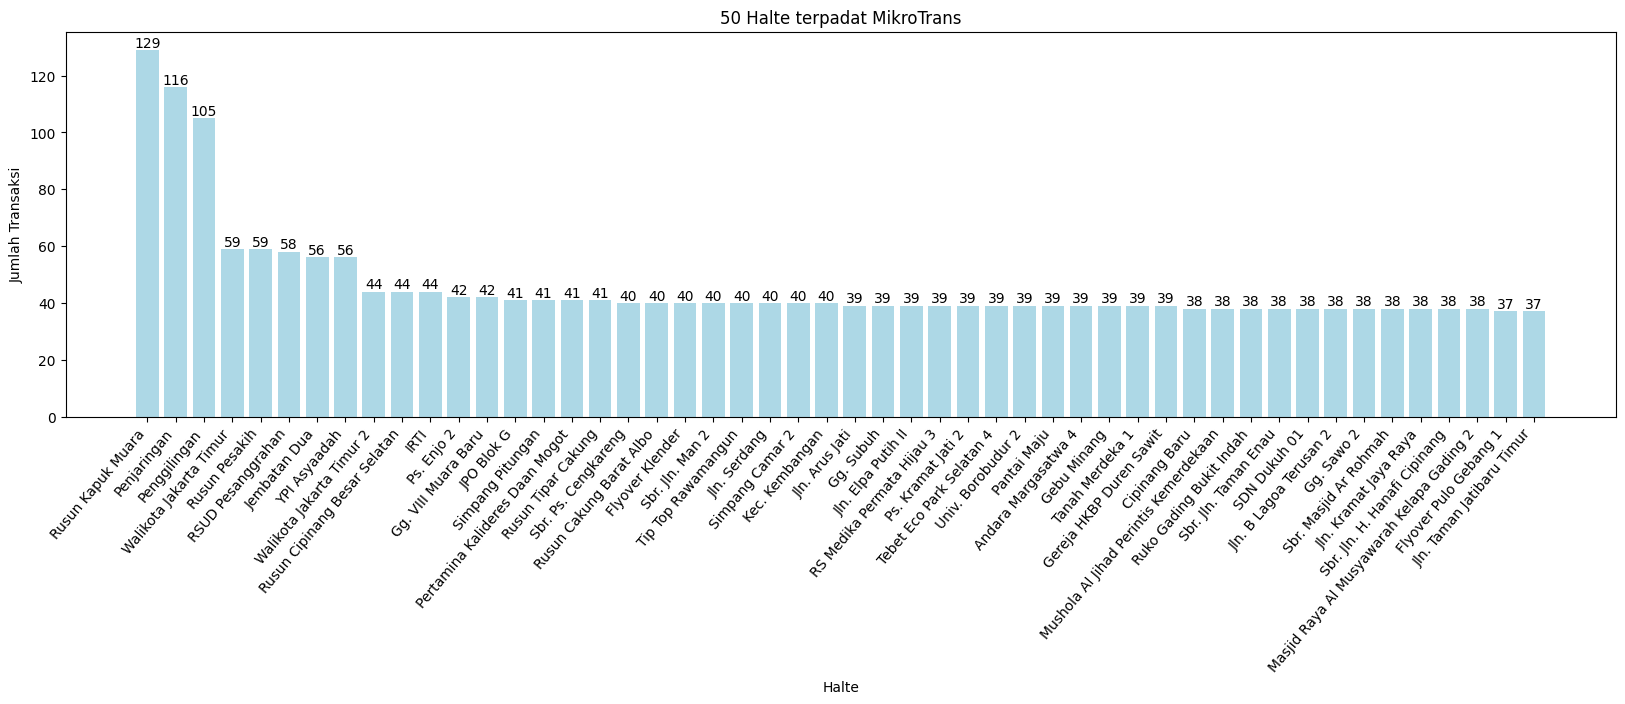

In [68]:
plt.figure(figsize=(20,5))
bars = plt.bar(haltePerTransaksiMT['tapInStopsName'],haltePerTransaksiMT['transID'],color='#ADD8E6')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.title('50 Halte terpadat MikroTrans')
plt.xlabel('Halte')
plt.xticks(rotation=50,ha='right')
plt.ylabel('Jumlah Transaksi')
plt.show()

In [69]:
busyhourWeekdayMT = data_mikrotrans[(data_mikrotrans['isWeekend']==False)][(df['tapInHour']>=16)&(df['tapInHour']<=21)]
busyhourWeekdayMT.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,JenisLayanan,tapInHour,tapInWeekday,isWeekend
306,UQBO067F4Q46YH,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,1.0,B01567P,...,Masjid Al Barakah Assyafiiyah,-6.220472,106.85080,15.0,2023-04-03 17:37:59,0.0,mikrotrans,16,0,False
307,YCKA830Y7F54EU,3587341902618993,dki,Darmanto Rajasa,F,1991,JAK.03,Lebak Bulus - Andara,0.0,B01204P,...,Jln. Pinang II Pondok Labu,-6.310414,106.79665,22.0,2023-04-03 19:43:32,0.0,mikrotrans,17,0,False
314,CRPN719K9R79EE,4056836188316,online,Nadine Utami,M,1975,JAK.46,Pasar Minggu - Jagakarsa,0.0,B01591P,...,Sbr. Gg. H. Yusuf Jati Padang,-6.293140,106.82863,27.0,2023-04-03 19:05:46,0.0,mikrotrans,17,0,False
319,WSBL539K5G66AY,5430018591726410,dki,Karna Waskita,M,1981,JAK.88,Terminal Tanjung Priok - Ancol Barat,1.0,B05970P,...,Jln. R. E. Martadinata,-6.130036,106.83429,19.0,2023-04-03 18:09:58,0.0,mikrotrans,16,0,False
321,MOHL390Z9E69AL,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,1.0,B03038P,...,Gg. Ayama,-6.272040,106.86710,29.0,2023-04-03 17:32:45,0.0,mikrotrans,16,0,False


In [70]:
transPerCorridorWeekdayMT = busyhourWeekdayMT.groupby(by='corridorID')[['transID']].count().reset_index()
transPerCorridorWeekdayMT

,corridorID,transID
0,10A,57
1,10B,61
2,11B,32
3,11C,19
4,11K,60
...,...,...
93,JAK.84,38
94,JAK.85,62
95,JAK.86,88
96,JAK.88,77


In [71]:
meanWeekdayMT = transPerCorridorWeekdayMT['transID'].mean()
meanWeekdayMT

71.63265306122449

In [72]:
# X = top 50
transPerCorridorXMT = transPerCorridorWeekdayMT.sort_values(by='transID',ascending=False).head(50)
transPerCorridorXMT

,corridorID,transID
24,JAK.06,160
7,11P,152
10,2E,147
67,JAK.42,138
87,JAK.72,134
29,JAK.11,133
31,JAK.112,124
52,JAK.27,124
74,JAK.49,119
70,JAK.44,119


In [73]:
# Y = bottom 50
transPerCorridorYMT = transPerCorridorWeekdayMT.sort_values(by='transID',ascending=False).tail(50)
transPerCorridorYMT

,corridorID,transID
44,JAK.19,73
84,JAK.61,69
19,JAK.01,64
56,JAK.31,63
71,JAK.45,63
16,4E,62
79,JAK.54,62
30,JAK.110A,62
33,JAK.115,62
94,JAK.85,62


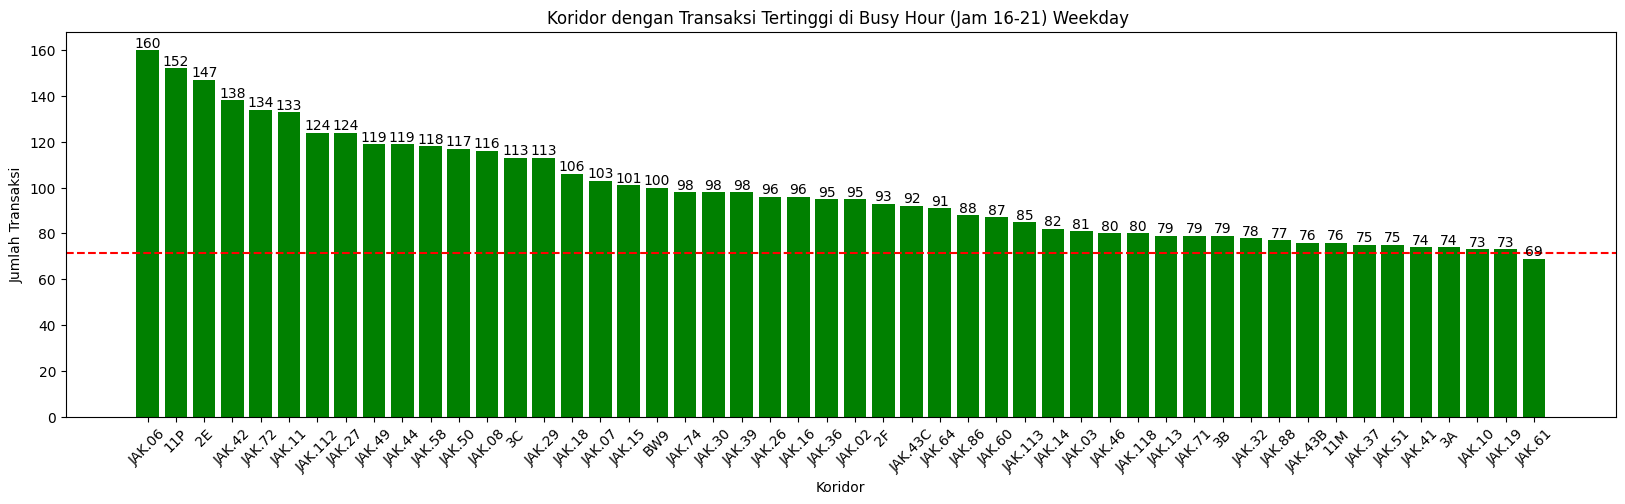

In [74]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorXMT['corridorID'],transPerCorridorXMT['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayMT, color='r', linestyle='--')
plt.title('Koridor dengan Transaksi Tertinggi di Busy Hour (Jam 16-21) Weekday ')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

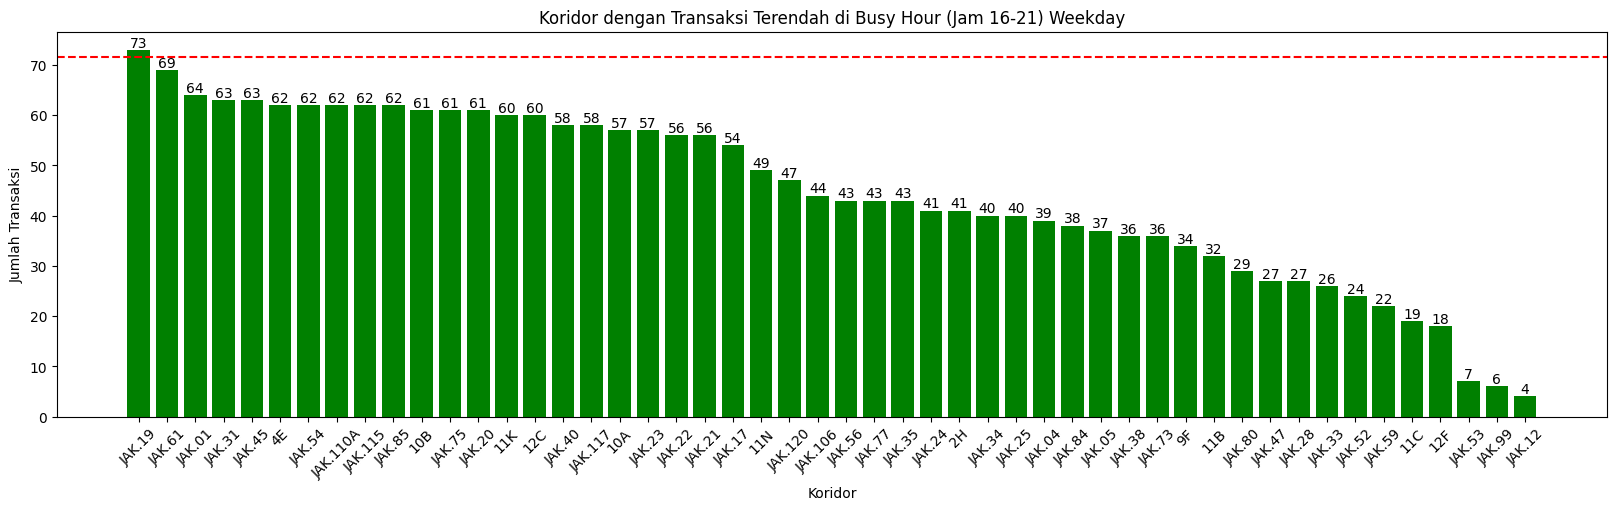

In [75]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorYMT['corridorID'],transPerCorridorYMT['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayMT, color='r', linestyle='--')
plt.title('Koridor dengan Transaksi Terendah di Busy Hour (Jam 16-21) Weekday')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

In [76]:
dfBusyHourWeekdayMT2 = data_mikrotrans[(data_mikrotrans['isWeekend']==False)][(data_mikrotrans['tapInHour']>=5)&(data_mikrotrans['tapInHour']<=9)]
dfBusyHourWeekdayMT2.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,JenisLayanan,tapInHour,tapInWeekday,isWeekend
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,...,NaN,NaN,NaN,NaN,NaN,0.0,mikrotrans,6,0,False
14,LZFD368Q3E81HJ,4056836188316,online,Nadine Utami,M,1975,JAK.46,Pasar Minggu - Jagakarsa,1.0,B00608P,...,Jln. Gabus Raya,-6.301222,106.83623,17.0,2023-04-03 06:09:17,0.0,mikrotrans,5,0,False
19,ZYRL615G4C05RD,5430018591726410,dki,Karna Waskita,M,1981,JAK.88,Terminal Tanjung Priok - Ancol Barat,0.0,B00722P,...,Jln. Ancol Barat 6,-6.124810,106.81983,36.0,2023-04-03 07:30:45,0.0,mikrotrans,6,0,False
21,ZJVI960B9I42DA,343851798729291,emoney,Garang Utama,F,1997,JAK.16,Cililitan - Condet,0.0,NaN,...,Jln. Mesjid Al Mabruk,-6.284350,106.85293,20.0,2023-04-03 05:30:45,0.0,mikrotrans,5,0,False
24,SYLN486U0E02TA,2295833910329055,dki,Taufik Farida,F,1981,JAK.02,Kampung Melayu - Duren Sawit,0.0,B05023P,...,RS Duren Sawit 2,-6.232262,106.91019,39.0,2023-04-03 06:12:52,0.0,mikrotrans,5,0,False


In [77]:
transPerCorridorWeekdayMT2 = dfBusyHourWeekdayMT2.groupby(by='corridorID')[['transID']].count().reset_index()
transPerCorridorWeekdayMT2

,corridorID,transID
0,10A,60
1,10B,60
2,11B,28
3,11C,20
4,11K,60
...,...,...
93,JAK.84,36
94,JAK.85,57
95,JAK.86,81
96,JAK.88,82


In [78]:
meanWeekdayMT2 = transPerCorridorWeekdayMT2['transID'].mean()
meanWeekdayMT2

69.83673469387755

In [79]:
# X = top 50
transPerCorridorXMT2 = transPerCorridorWeekdayMT2.sort_values(by='transID',ascending=False).head(50)
transPerCorridorXMT2

,corridorID,transID
7,11P,157
24,JAK.06,156
87,JAK.72,141
10,2E,138
29,JAK.11,135
67,JAK.42,130
31,JAK.112,118
15,3C,118
81,JAK.58,116
52,JAK.27,116


In [80]:
# Y = bottom 50
transPerCorridorYMT2 = transPerCorridorWeekdayMT2.sort_values(by='transID',ascending=False).tail(50)
transPerCorridorYMT2

,corridorID,transID
62,JAK.37,64
44,JAK.19,62
16,4E,62
45,JAK.20,61
0,10A,60
84,JAK.61,60
90,JAK.75,60
4,11K,60
1,10B,60
30,JAK.110A,60


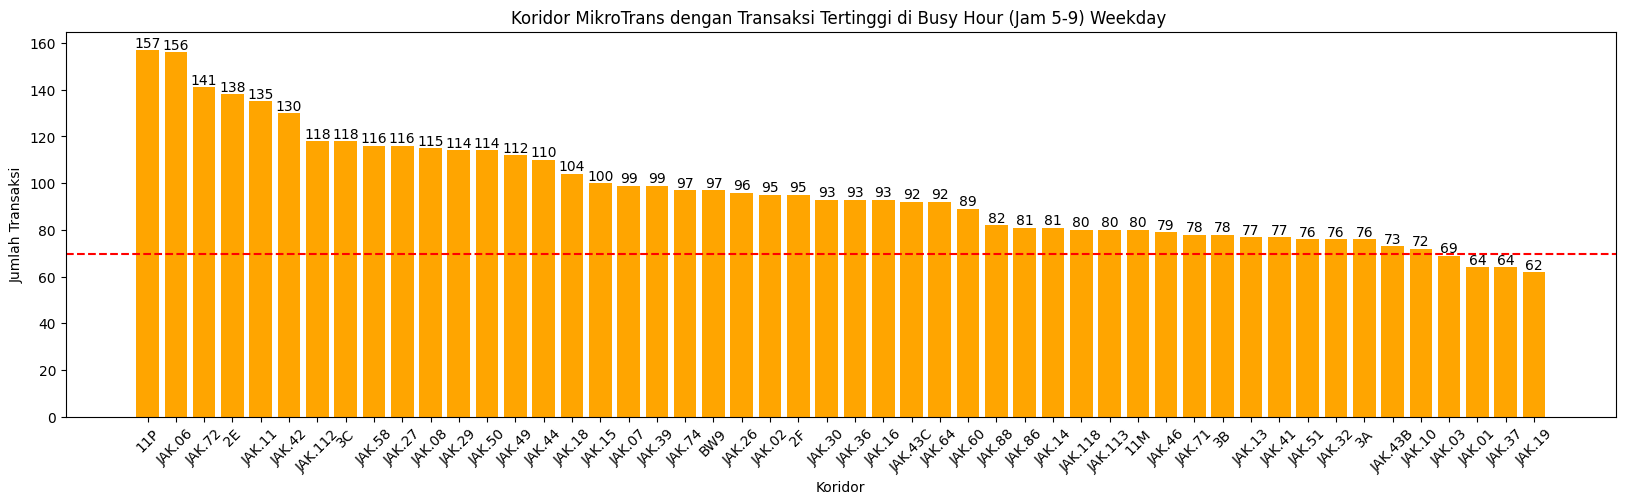

In [81]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorXMT2['corridorID'],transPerCorridorXMT2['transID'],color='orange')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayMT2, color='r', linestyle='--')
plt.title('Koridor MikroTrans dengan Transaksi Tertinggi di Busy Hour (Jam 5-9) Weekday ')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

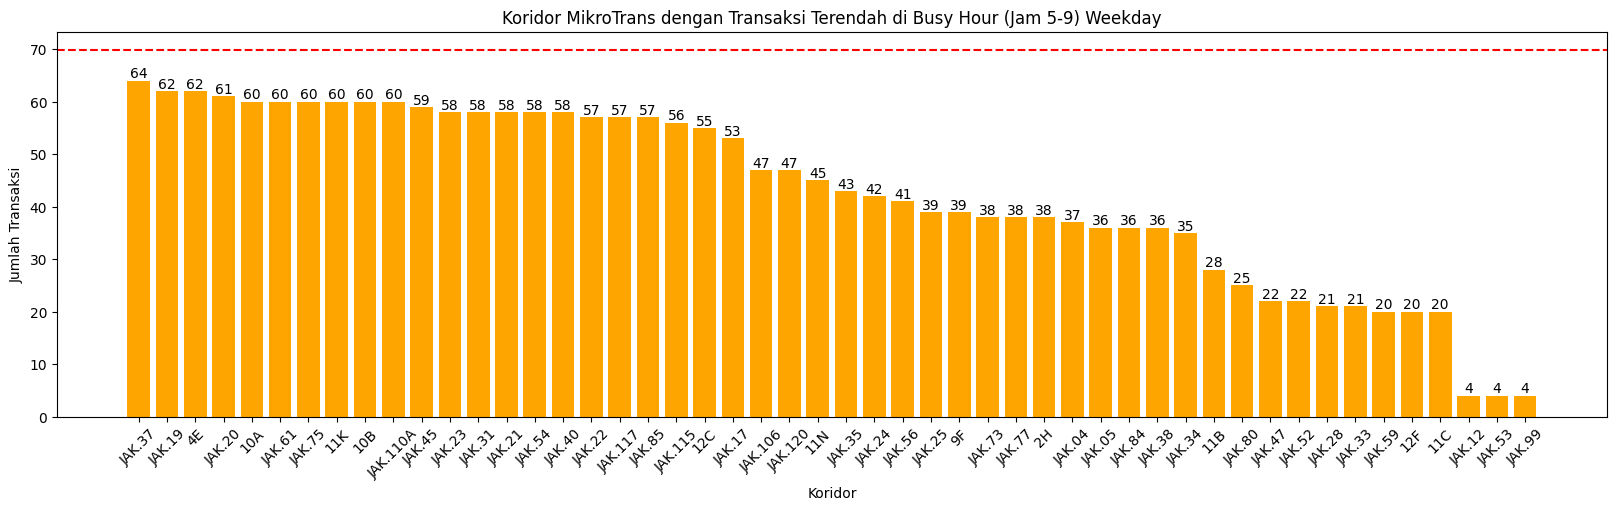

In [82]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorYMT2['corridorID'],transPerCorridorYMT2['transID'],color='orange')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayMT2, color='r', linestyle='--')
plt.title('Koridor MikroTrans dengan Transaksi Terendah di Busy Hour (Jam 5-9) Weekday')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

In [83]:
# HALTE TERPADAT
haltePerTransaksiMT2 = data_mikrotrans.groupby(by='tapInStopsName')[['transID']].count().reset_index()
haltePerTransaksiMT2 = haltePerTransaksiMT2.sort_values(by='transID',ascending=False).head(50)
haltePerTransaksiMT2.head()

,tapInStopsName,transID
920,Rusun Kapuk Muara,129
729,Penjaringan,116
726,Penggilingan,105
1592,Walikota Jakarta Timur,59
929,Rusun Pesakih,59


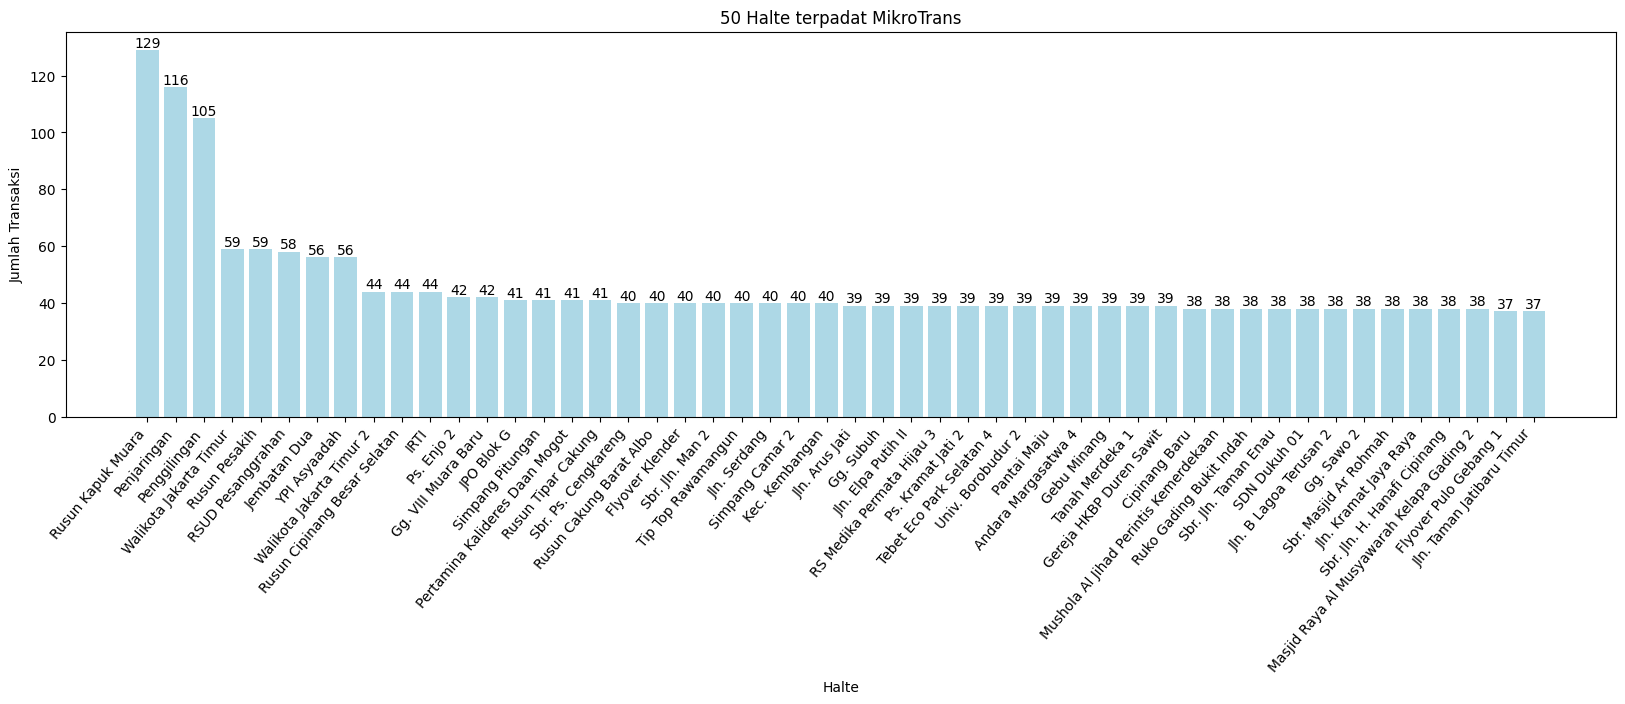

In [84]:
plt.figure(figsize=(20,5))
bars = plt.bar(haltePerTransaksiMT2['tapInStopsName'],haltePerTransaksiMT2['transID'],color='#ADD8E6')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.title('50 Halte terpadat MikroTrans')
plt.xlabel('Halte')
plt.xticks(rotation=50,ha='right')
plt.ylabel('Jumlah Transaksi')
plt.show()

### BUSY HOUR ROYALTRANS

In [85]:
busyhourWeekdayRT = data_royaltrans[(data_royaltrans['isWeekend']==False)].groupby(by='tapInHour')[['transID']].count().reset_index()
busyhourWeekdayRT

,tapInHour,transID
0,5,78
1,6,210
2,7,146
3,8,155
4,9,153
5,10,2
6,11,2
7,12,5
8,13,4
9,15,3


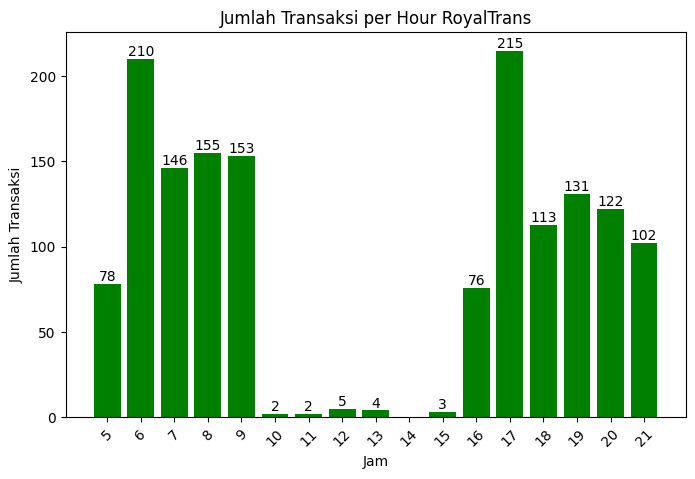

In [86]:
plt.figure(figsize=(8,5))
bars = plt.bar(busyhourWeekdayRT['tapInHour'],busyhourWeekdayRT['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.title('Jumlah Transaksi per Hour RoyalTrans')
plt.xlabel('Jam')
plt.xticks(np.arange(5,22,1),rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

In [87]:
busyhourWeekendRT = data_royaltrans[(data_royaltrans['isWeekend']==True)].groupby(by='tapInHour')[['transID']].count().reset_index()
busyhourWeekendRT

,tapInHour,transID
0,5,8
1,6,9
2,7,5
3,8,11
4,9,8
5,10,8
6,11,6
7,12,12
8,13,6
9,14,9


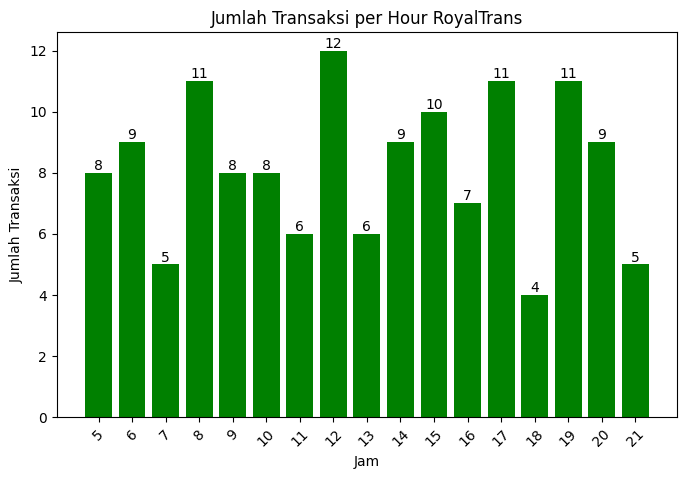

In [88]:
plt.figure(figsize=(8,5))
bars = plt.bar(busyhourWeekendRT['tapInHour'],busyhourWeekendRT['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.title('Jumlah Transaksi per Hour RoyalTrans')
plt.xlabel('Jam')
plt.xticks(np.arange(5,22,1),rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

### TRANSAKSI KORIDOR ROYAL TRANS

In [89]:
busyhourWeekdayRT = data_royaltrans[(data_royaltrans['isWeekend']==False)][(df['tapInHour']>=16)&(df['tapInHour']<=21)]
busyhourWeekdayRT.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,JenisLayanan,tapInHour,tapInWeekday,isWeekend
305,ELVF454E9T40AX,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,1.0,B00325P,...,Plaza Sentral,-6.216247,106.81676,12.0,2023-04-03 17:08:45,20000.0,royaltrans,16,0,False
308,FMYJ409Z0K75HJ,6510013988638519,dki,"Cagak Maheswara, S.Sos",F,1992,B14,Bekasi Barat - Kuningan,0.0,B01963P,...,Setiabudi Utara 2,-6.207513,106.82940,15.0,2023-04-03 18:15:14,20000.0,royaltrans,16,0,False
360,QLDR614W7F89ZJ,4290559479079,online,Lutfan Hakim,M,2011,T21,Palem Semi - Bundaran Senayan,0.0,B00611P,...,Summitmas,-6.225826,106.80402,10.0,2023-04-03 18:33:10,20000.0,royaltrans,17,0,False
370,BXVS080I7X46TX,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,1.0,B05773P,...,Dukuh Atas 3,-6.205650,106.82250,7.0,2023-04-03 19:39:59,20000.0,royaltrans,17,0,False
417,HTYF055B8H05QQ,4709994160903,online,"Cut Gabriella Haryanti, S.Sos",M,1974,T21,Palem Semi - Bundaran Senayan,0.0,B00611P,...,Bundaran Senayan 2,-6.227877,106.80068,12.0,2023-04-03 18:51:56,20000.0,royaltrans,17,0,False


In [90]:
transPerCorridorWeekdayRT = busyhourWeekdayRT.groupby(by='corridorID')[['transID']].count().reset_index()
transPerCorridorWeekdayRT

,corridorID,transID
0,1K,70
1,1T,189
2,6P,39
3,B13,58
4,B14,96
5,D31,37
6,D32,83
7,S12,39
8,S31,64
9,T21,84


In [91]:
meanWeekdayRT = transPerCorridorWeekdayRT['transID'].mean()
meanWeekdayRT

75.9

In [92]:
# X = top 50
transPerCorridorXRT = transPerCorridorWeekdayRT.sort_values(by='transID',ascending=False).head(50)
transPerCorridorXRT

,corridorID,transID
1,1T,189
4,B14,96
9,T21,84
6,D32,83
0,1K,70
8,S31,64
3,B13,58
2,6P,39
7,S12,39
5,D31,37


In [93]:
# Y = bottom 50
transPerCorridorYRT = transPerCorridorWeekdayRT.sort_values(by='transID',ascending=False).tail(50)
transPerCorridorYRT

,corridorID,transID
1,1T,189
4,B14,96
9,T21,84
6,D32,83
0,1K,70
8,S31,64
3,B13,58
2,6P,39
7,S12,39
5,D31,37


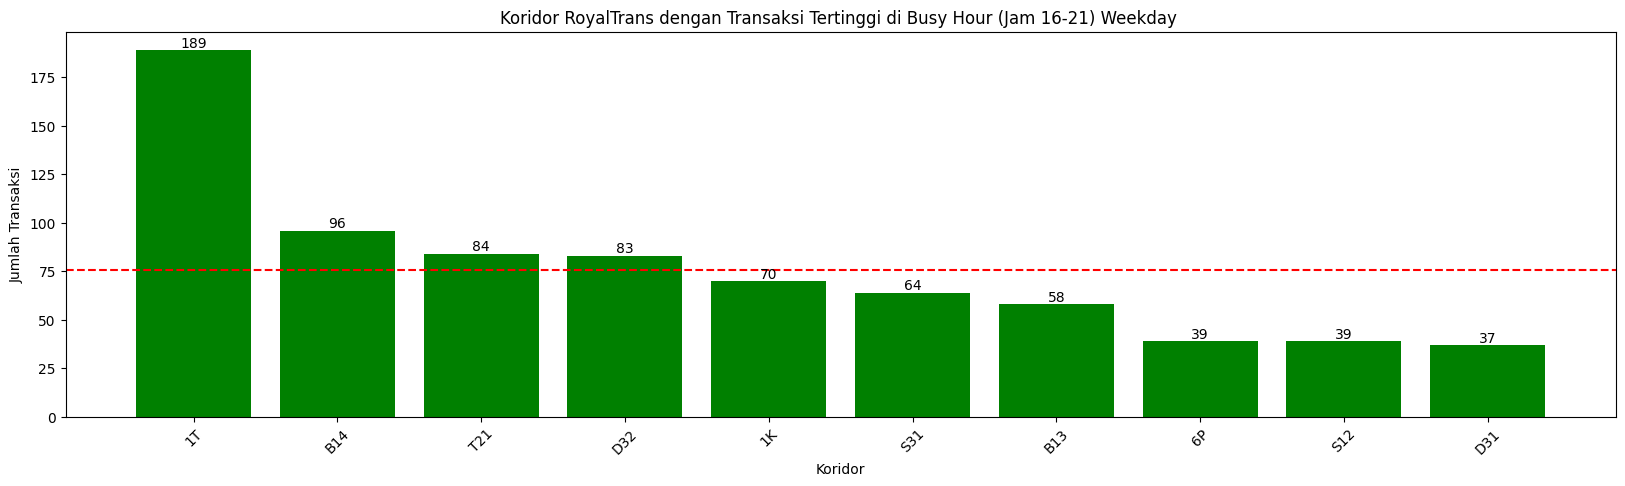

In [94]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorXRT['corridorID'],transPerCorridorXRT['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayRT, color='r', linestyle='--')
plt.title('Koridor RoyalTrans dengan Transaksi Tertinggi di Busy Hour (Jam 16-21) Weekday ')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

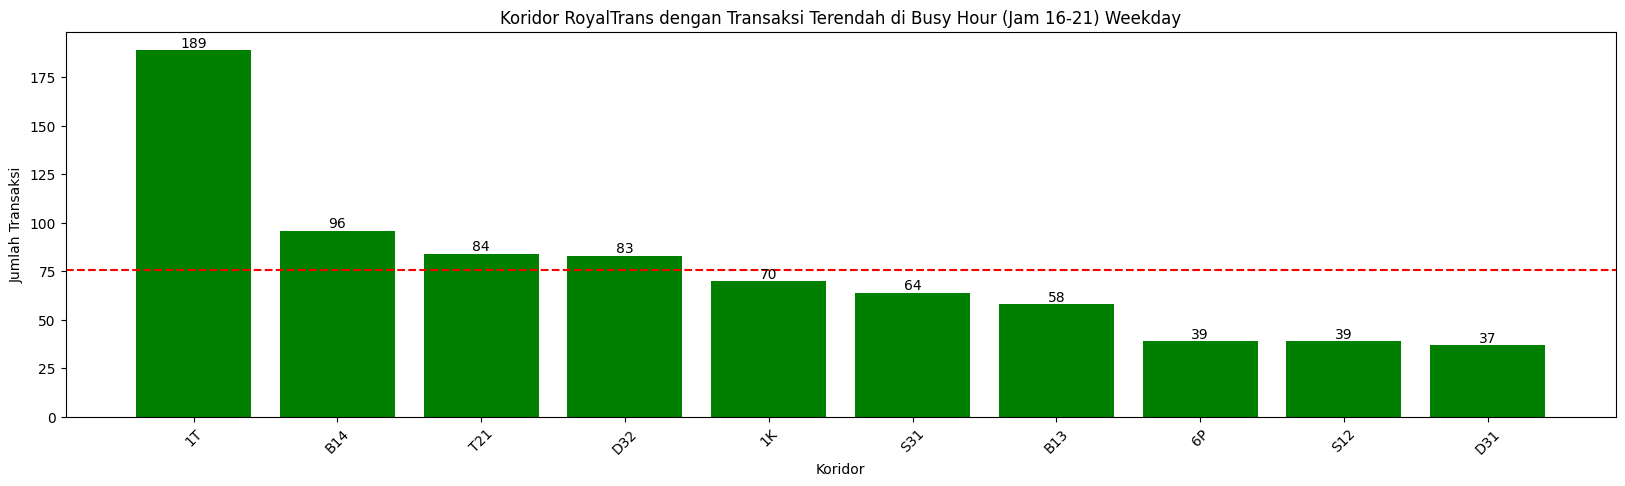

In [95]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorYRT['corridorID'],transPerCorridorYRT['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayRT, color='r', linestyle='--')
plt.title('Koridor RoyalTrans dengan Transaksi Terendah di Busy Hour (Jam 16-21) Weekday')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

In [96]:
dfBusyHourWeekdayRT2 = data_royaltrans[(data_royaltrans['isWeekend']==False)][(data_royaltrans['tapInHour']>=5)&(data_royaltrans['tapInHour']<=9)]
dfBusyHourWeekdayRT2.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,JenisLayanan,tapInHour,tapInWeekday,isWeekend
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,0.0,B00127P,...,Grand Sahid,-6.210975,106.82059,6.0,2023-04-03 05:52:25,20000.0,royaltrans,5,0,False
8,OIHS248V7S72EB,6510013988638519,dki,"Cagak Maheswara, S.Sos",F,1992,B14,Bekasi Barat - Kuningan,1.0,B00795P,...,Kayuringin 2,-6.245948,106.99247,16.0,2023-04-03 06:51:12,20000.0,royaltrans,6,0,False
70,OTGH855B8A29BP,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,0.0,B02408P,...,NaN,NaN,NaN,NaN,NaN,20000.0,royaltrans,5,0,False
117,YTOA058V9U73VN,4709994160903,online,"Cut Gabriella Haryanti, S.Sos",M,1974,T21,Palem Semi - Bundaran Senayan,1.0,B00808P,...,Palem Semi 2,-6.220361,106.61649,12.0,2023-04-03 07:20:36,20000.0,royaltrans,6,0,False
134,ESJQ990H8Q22LV,345711968178505,emoney,Kawaya Oktaviani,M,2009,1T,Cibubur - Balai Kota,1.0,B00102P,...,Flyover Karet 2,-6.214808,106.81847,11.0,2023-04-03 06:09:57,20000.0,royaltrans,5,0,False


In [97]:
transPerCorridorWeekdayRT2 = dfBusyHourWeekdayRT2.groupby(by='corridorID')[['transID']].count().reset_index()
transPerCorridorWeekdayRT2

,corridorID,transID
0,1K,64
1,1T,192
2,6P,37
3,B13,54
4,B14,102
5,D31,39
6,D32,77
7,S12,39
8,S31,60
9,T21,78


In [98]:
meanWeekdayRT2 = transPerCorridorWeekdayRT2['transID'].mean()
meanWeekdayRT2

74.2

In [99]:
# X = top 50
transPerCorridorXRT2 = transPerCorridorWeekdayRT2.sort_values(by='transID',ascending=False).head(50)
transPerCorridorXRT2

,corridorID,transID
1,1T,192
4,B14,102
9,T21,78
6,D32,77
0,1K,64
8,S31,60
3,B13,54
5,D31,39
7,S12,39
2,6P,37


In [100]:
# Y = bottom 50
transPerCorridorYRT2 = transPerCorridorWeekdayRT2.sort_values(by='transID',ascending=False).tail(50)
transPerCorridorYRT2

,corridorID,transID
1,1T,192
4,B14,102
9,T21,78
6,D32,77
0,1K,64
8,S31,60
3,B13,54
5,D31,39
7,S12,39
2,6P,37


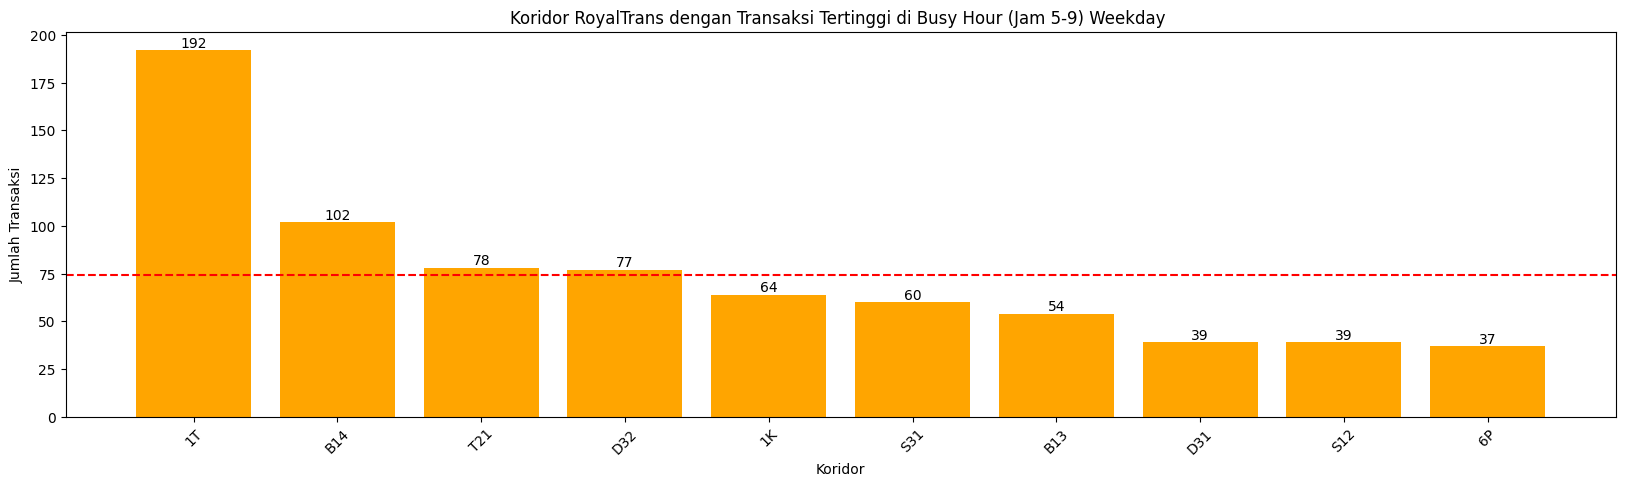

In [101]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorXRT2['corridorID'],transPerCorridorXRT2['transID'],color='orange')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayRT2, color='r', linestyle='--')
plt.title('Koridor RoyalTrans dengan Transaksi Tertinggi di Busy Hour (Jam 5-9) Weekday ')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

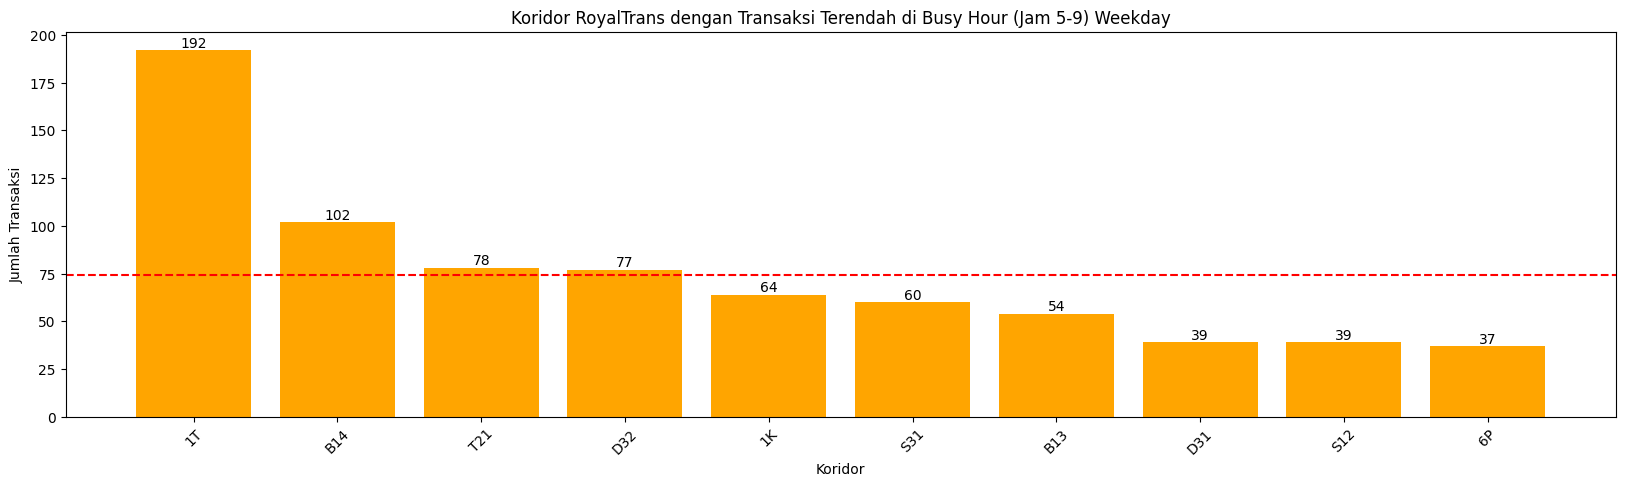

In [102]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorYRT2['corridorID'],transPerCorridorYRT2['transID'],color='orange')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayRT2, color='r', linestyle='--')
plt.title('Koridor RoyalTrans dengan Transaksi Terendah di Busy Hour (Jam 5-9) Weekday')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

In [103]:
# HALTE TERPADAT
haltePerTransaksiRT = data_royaltrans.groupby(by='tapInStopsName')[['transID']].count().reset_index()
haltePerTransaksiRT = haltePerTransaksiRT.sort_values(by='transID',ascending=False).head(50)
haltePerTransaksiRT.head()

,tapInStopsName,transID
26,Gelora Bung Karno 1,79
11,Bundaran Senayan 1,79
8,Bintaro Xchange,67
79,St. MRT Fatmawati,64
43,Kemenkes 2,59


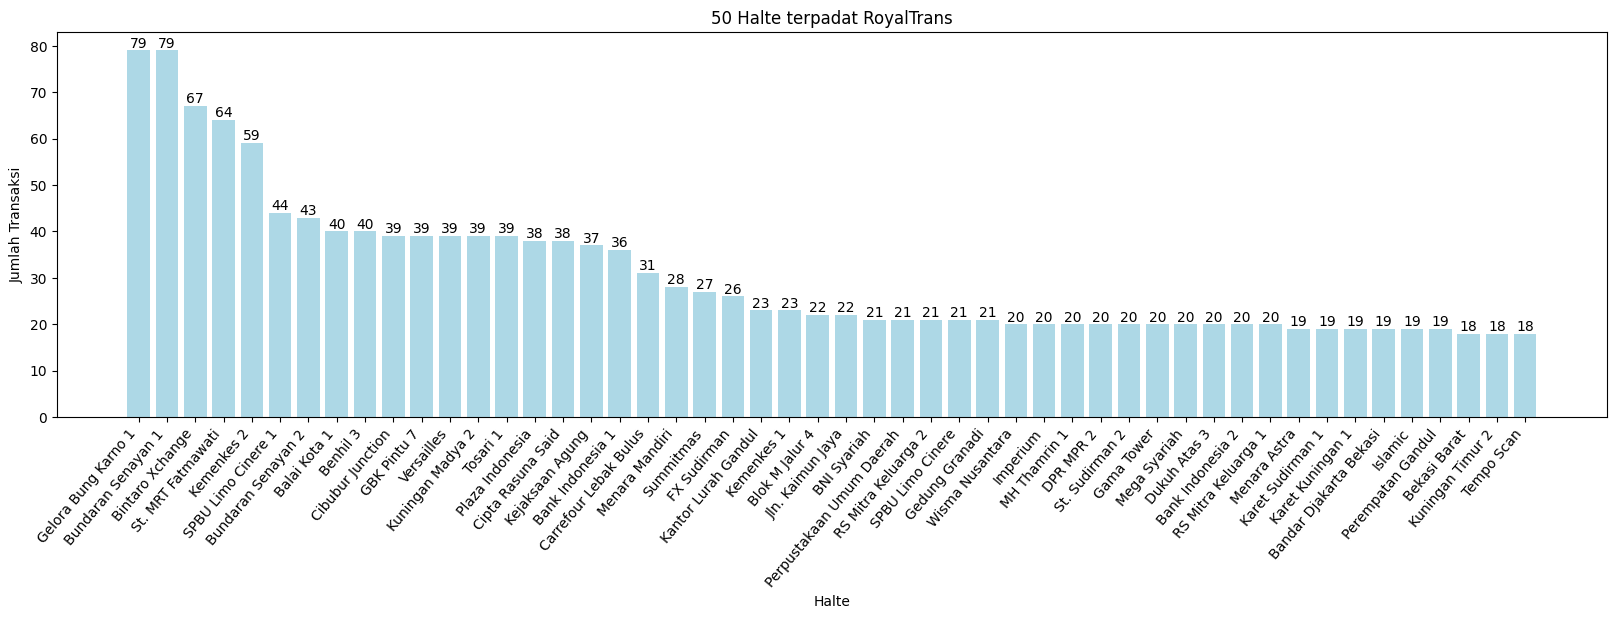

In [104]:
plt.figure(figsize=(20,5))
bars = plt.bar(haltePerTransaksiRT['tapInStopsName'],haltePerTransaksiRT['transID'],color='#ADD8E6')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.title('50 Halte terpadat RoyalTrans')
plt.xlabel('Halte')
plt.xticks(rotation=50,ha='right')
plt.ylabel('Jumlah Transaksi')
plt.show()

In [105]:
busyhourWeekdayRT = data_royaltrans[(data_royaltrans['isWeekend']==False)][(df['tapInHour']>=16)&(df['tapInHour']<=21)]
busyhourWeekdayRT.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,JenisLayanan,tapInHour,tapInWeekday,isWeekend
305,ELVF454E9T40AX,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,1.0,B00325P,...,Plaza Sentral,-6.216247,106.81676,12.0,2023-04-03 17:08:45,20000.0,royaltrans,16,0,False
308,FMYJ409Z0K75HJ,6510013988638519,dki,"Cagak Maheswara, S.Sos",F,1992,B14,Bekasi Barat - Kuningan,0.0,B01963P,...,Setiabudi Utara 2,-6.207513,106.82940,15.0,2023-04-03 18:15:14,20000.0,royaltrans,16,0,False
360,QLDR614W7F89ZJ,4290559479079,online,Lutfan Hakim,M,2011,T21,Palem Semi - Bundaran Senayan,0.0,B00611P,...,Summitmas,-6.225826,106.80402,10.0,2023-04-03 18:33:10,20000.0,royaltrans,17,0,False
370,BXVS080I7X46TX,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,1.0,B05773P,...,Dukuh Atas 3,-6.205650,106.82250,7.0,2023-04-03 19:39:59,20000.0,royaltrans,17,0,False
417,HTYF055B8H05QQ,4709994160903,online,"Cut Gabriella Haryanti, S.Sos",M,1974,T21,Palem Semi - Bundaran Senayan,0.0,B00611P,...,Bundaran Senayan 2,-6.227877,106.80068,12.0,2023-04-03 18:51:56,20000.0,royaltrans,17,0,False


In [106]:
transPerCorridorWeekdayRT = busyhourWeekdayRT.groupby(by='corridorID')[['transID']].count().reset_index()
transPerCorridorWeekdayRT

,corridorID,transID
0,1K,70
1,1T,189
2,6P,39
3,B13,58
4,B14,96
5,D31,37
6,D32,83
7,S12,39
8,S31,64
9,T21,84


In [107]:
meanWeekdayRT = transPerCorridorWeekdayRT['transID'].mean()
meanWeekdayRT

75.9

In [108]:
# X = top 50
transPerCorridorXRT = transPerCorridorWeekdayRT.sort_values(by='transID',ascending=False).head(50)
transPerCorridorXRT

,corridorID,transID
1,1T,189
4,B14,96
9,T21,84
6,D32,83
0,1K,70
8,S31,64
3,B13,58
2,6P,39
7,S12,39
5,D31,37


In [109]:
# Y = bottom 50
transPerCorridorYRT = transPerCorridorWeekdayRT.sort_values(by='transID',ascending=False).tail(50)
transPerCorridorYRT

,corridorID,transID
1,1T,189
4,B14,96
9,T21,84
6,D32,83
0,1K,70
8,S31,64
3,B13,58
2,6P,39
7,S12,39
5,D31,37


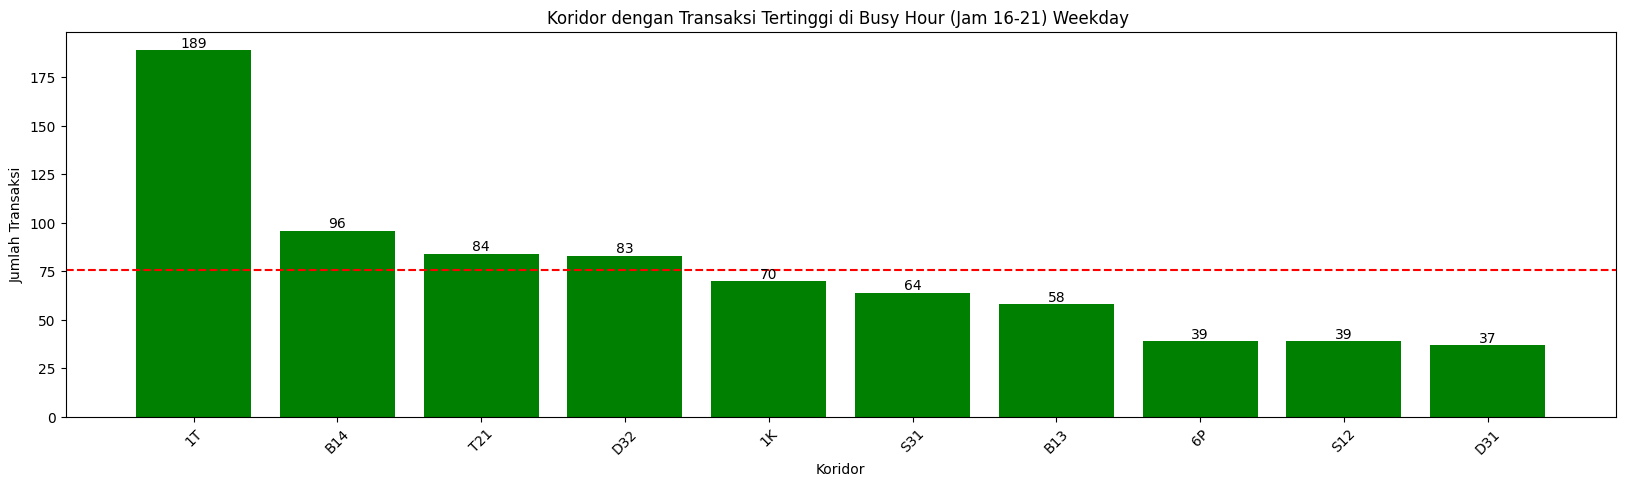

In [110]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorXRT['corridorID'],transPerCorridorXRT['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayRT, color='r', linestyle='--')
plt.title('Koridor dengan Transaksi Tertinggi di Busy Hour (Jam 16-21) Weekday ')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

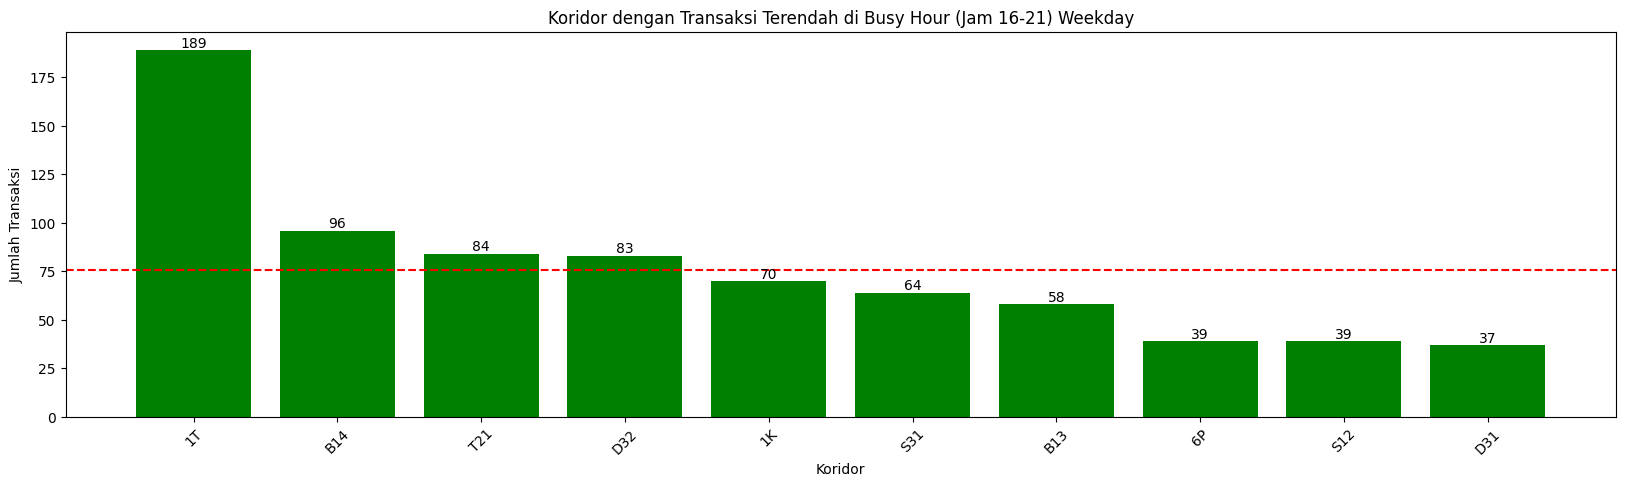

In [111]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorYRT['corridorID'],transPerCorridorYRT['transID'],color='green')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayRT, color='r', linestyle='--')
plt.title('Koridor dengan Transaksi Terendah di Busy Hour (Jam 16-21) Weekday')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

In [112]:
dfBusyHourWeekdayRT2 = data_royaltrans[(data_royaltrans['isWeekend']==False)][(data_royaltrans['tapInHour']>=5)&(data_royaltrans['tapInHour']<=9)]
dfBusyHourWeekdayRT2.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,JenisLayanan,tapInHour,tapInWeekday,isWeekend
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,0.0,B00127P,...,Grand Sahid,-6.210975,106.82059,6.0,2023-04-03 05:52:25,20000.0,royaltrans,5,0,False
8,OIHS248V7S72EB,6510013988638519,dki,"Cagak Maheswara, S.Sos",F,1992,B14,Bekasi Barat - Kuningan,1.0,B00795P,...,Kayuringin 2,-6.245948,106.99247,16.0,2023-04-03 06:51:12,20000.0,royaltrans,6,0,False
70,OTGH855B8A29BP,3549158005951908,dki,"Mustofa Wijayanti, M.Farm",M,1981,1T,Cibubur - Balai Kota,0.0,B02408P,...,NaN,NaN,NaN,NaN,NaN,20000.0,royaltrans,5,0,False
117,YTOA058V9U73VN,4709994160903,online,"Cut Gabriella Haryanti, S.Sos",M,1974,T21,Palem Semi - Bundaran Senayan,1.0,B00808P,...,Palem Semi 2,-6.220361,106.61649,12.0,2023-04-03 07:20:36,20000.0,royaltrans,6,0,False
134,ESJQ990H8Q22LV,345711968178505,emoney,Kawaya Oktaviani,M,2009,1T,Cibubur - Balai Kota,1.0,B00102P,...,Flyover Karet 2,-6.214808,106.81847,11.0,2023-04-03 06:09:57,20000.0,royaltrans,5,0,False


In [113]:
transPerCorridorWeekdayRT2 = dfBusyHourWeekdayRT2.groupby(by='corridorID')[['transID']].count().reset_index()
transPerCorridorWeekdayRT2

,corridorID,transID
0,1K,64
1,1T,192
2,6P,37
3,B13,54
4,B14,102
5,D31,39
6,D32,77
7,S12,39
8,S31,60
9,T21,78


In [114]:
meanWeekdayRT2 = transPerCorridorWeekdayRT2['transID'].mean()
meanWeekdayRT2

74.2

In [115]:
# X = top 50
transPerCorridorXRT2 = transPerCorridorWeekdayRT2.sort_values(by='transID',ascending=False).head(50)
transPerCorridorXRT2

,corridorID,transID
1,1T,192
4,B14,102
9,T21,78
6,D32,77
0,1K,64
8,S31,60
3,B13,54
5,D31,39
7,S12,39
2,6P,37


In [116]:
# Y = bottom 50
transPerCorridorYRT2 = transPerCorridorWeekdayRT2.sort_values(by='transID',ascending=False).tail(50)
transPerCorridorYRT2

,corridorID,transID
1,1T,192
4,B14,102
9,T21,78
6,D32,77
0,1K,64
8,S31,60
3,B13,54
5,D31,39
7,S12,39
2,6P,37


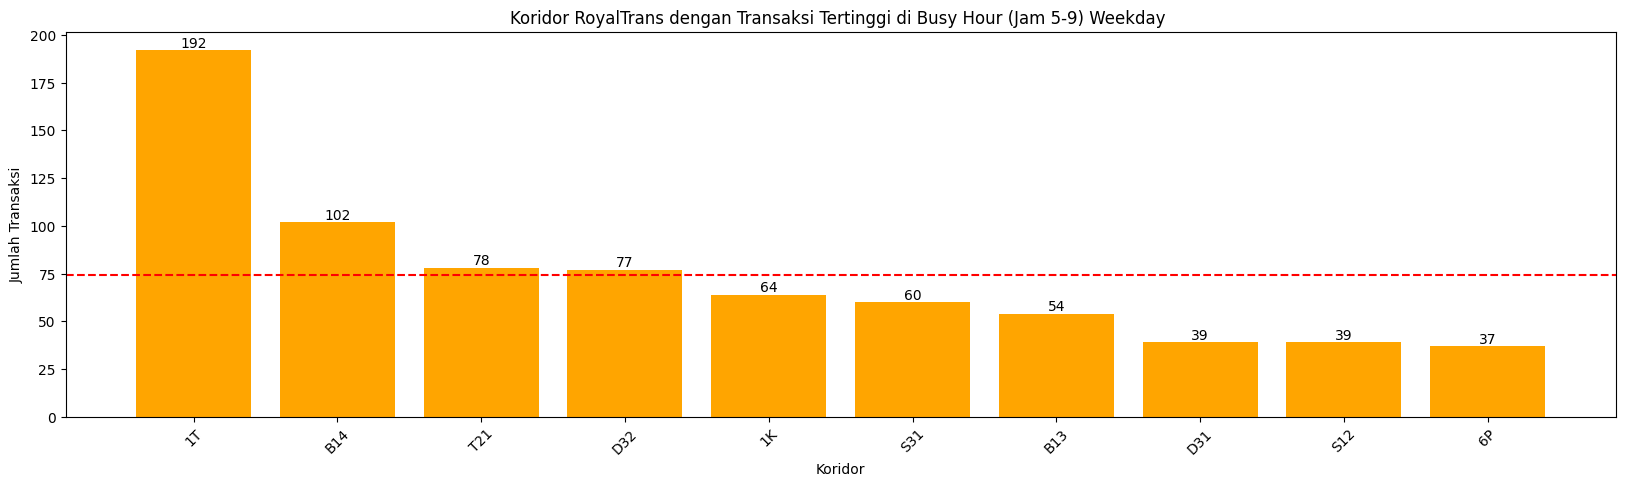

In [117]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorXRT2['corridorID'],transPerCorridorXRT2['transID'],color='orange')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayRT2, color='r', linestyle='--')
plt.title('Koridor RoyalTrans dengan Transaksi Tertinggi di Busy Hour (Jam 5-9) Weekday ')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

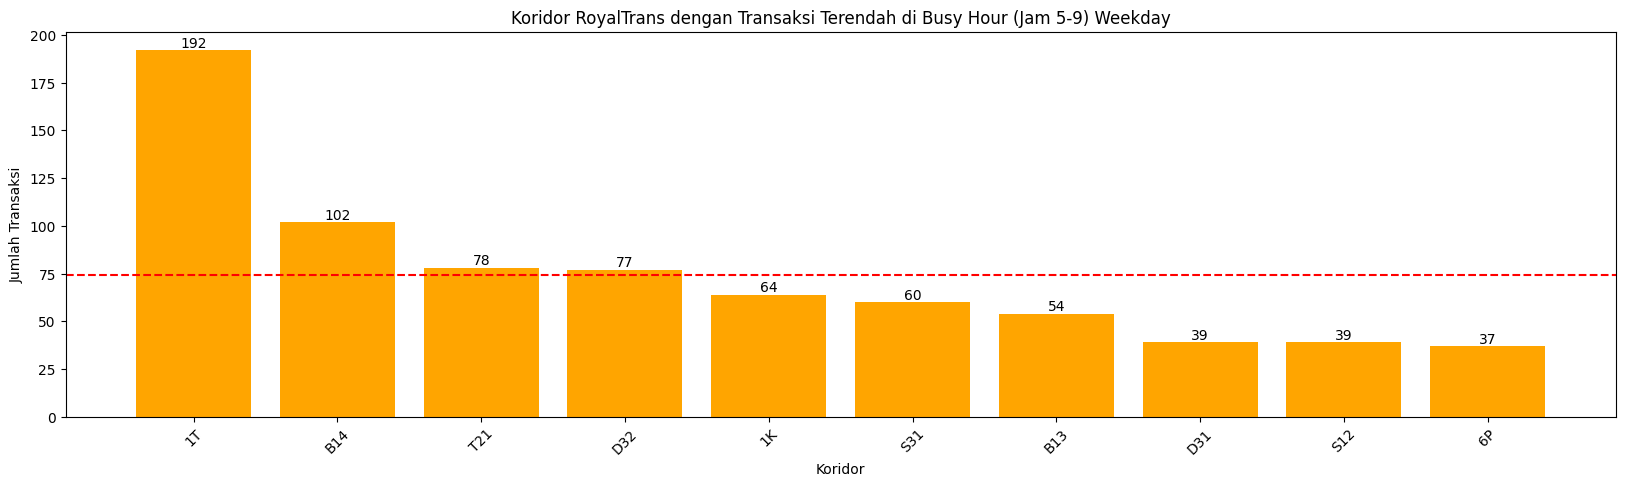

In [118]:
plt.figure(figsize=(20,5))
bars = plt.bar(transPerCorridorYRT2['corridorID'],transPerCorridorYRT2['transID'],color='orange')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.axhline(y=meanWeekdayRT2, color='r', linestyle='--')
plt.title('Koridor RoyalTrans dengan Transaksi Terendah di Busy Hour (Jam 5-9) Weekday')
plt.xlabel('Koridor')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Transaksi')
plt.show()

In [119]:
# HALTE TERPADAT
haltePerTransaksiRT2 = data_royaltrans.groupby(by='tapInStopsName')[['transID']].count().reset_index()
haltePerTransaksiRT2 = haltePerTransaksiRT2.sort_values(by='transID',ascending=False).head(50)
haltePerTransaksiRT2.head()

,tapInStopsName,transID
26,Gelora Bung Karno 1,79
11,Bundaran Senayan 1,79
8,Bintaro Xchange,67
79,St. MRT Fatmawati,64
43,Kemenkes 2,59


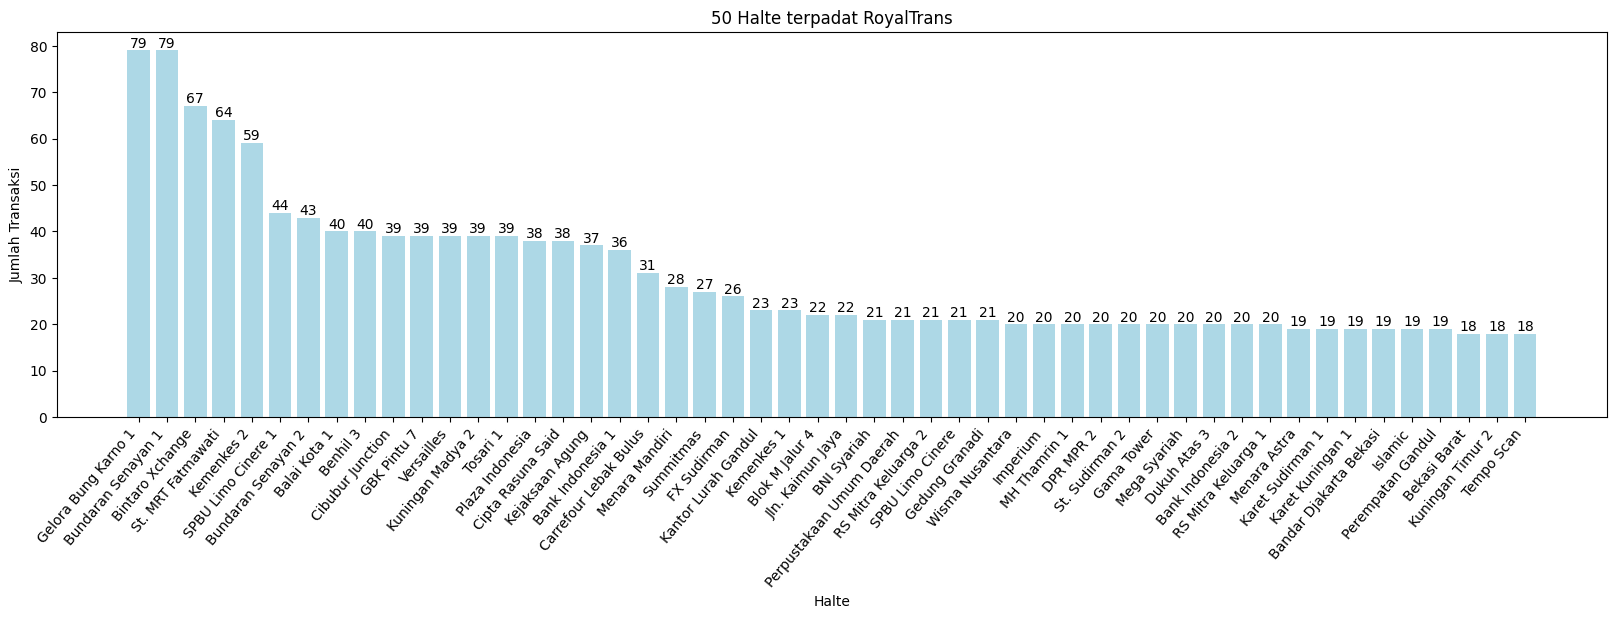

In [120]:
plt.figure(figsize=(20,5))
bars = plt.bar(haltePerTransaksiRT2['tapInStopsName'],haltePerTransaksiRT2['transID'],color='#ADD8E6')

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

plt.title('50 Halte terpadat RoyalTrans')
plt.xlabel('Halte')
plt.xticks(rotation=50,ha='right')
plt.ylabel('Jumlah Transaksi')
plt.show()

In [122]:
df.to_excel('CapstoneProject.xlsx')